In [1]:
!git clone https://huggingface.co/datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification
!git clone https://github.com/angiegh2002/nlp_hw

Cloning into 'Arabic_Dialect_Identification'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33 (from 1)
Unpacking objects: 100% (33/33), 6.47 KiB | 287.00 KiB/s, done.
Cloning into 'nlp_hw'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 251 (delta 57), reused 5 (delta 5), pack-reused 160 (from 1)
Receiving objects: 100% (251/251), 17.71 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install gensim
!pip install fasttext
!pip install wordcloud
!pip install tensorflow

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286.8/286.8 kB 4.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296230 sha256=ceafc28efa8317735c57ba9c91585c880622a625335a97d0f625ee8e0382742f
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


#[ÿ•ŸÜÿ¨Ÿä ÿ∫ÿ®Ÿäÿ≥ - ÿØÿßŸÜÿß ŸÉŸÑÿ¥ ]

<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [3]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud
import regex,re
import os
import json
import nltk
from nltk.tokenize import  wordpunct_tokenize
from nltk import FreqDist, bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import fasttext
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, balanced_accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input,Dense,Dropout,Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras import models
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Load data

<h2 dir="rtl">ŸÖÿ´ÿßŸÑ ÿπŸÜ ŸÉŸäŸÅŸäÿ© ÿ™ŸÜÿ∏ŸäŸÖ ÿ≠ŸÑŸàŸÑ ÿßŸÑÿ∑ŸÑÿ®ÿßÿ™:

ŸÇŸÖ ÿ®Ÿàÿ∂ÿπ ÿßŸÑÿÆŸÑÿßŸäÿß ÿßŸÑÿ£ÿ±ÿ®ÿπ ÿßŸÑÿ™ÿßŸÑŸäÿ© ŸÑÿ≠ŸÑ ŸÉŸÑ ÿ∑ŸÑÿ®</h2>


<div dir="rtl">ÿ¥ÿ±ÿ≠ ŸÖÿß ŸäŸÇŸàŸÖ ÿ®Ÿá ÿßŸÑŸÉŸàÿØ (like code documentation)<div>

In [ ]:
# your code here


In [33]:
# example test

<div dir="rtl">ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ŸÉ ŸÅŸä ÿ≠ÿßŸÑ Ÿàÿ¨ŸàÿØŸáÿß</div>
<div dir="rtl">ŸäŸÖŸÉŸÜŸÉ ÿ•ÿ∂ÿßŸÅÿ© ÿÆŸÑÿßŸäÿß ŸÑŸÉŸÑ ÿ∑ŸÑÿ® ÿ®ŸÇÿØÿ± ŸÖÿß ÿ™ÿ¥ÿßÿ°ÿå ÿßŸÑŸÖŸáŸÖ ÿ£ŸÜ ÿ™ÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ÿ™ŸÜÿ∏ŸäŸÖ ÿßŸÑŸÖŸÑŸÅ</div>

# ŸÖŸáŸÖÿ© 01  : ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

## [1.1]

ÿßŸÑŸÉŸàÿØ ÿßŸÑÿ™ÿßŸÑŸä ŸäŸÇŸàŸÖ ÿ®ŸÇÿ±ÿßÿ°ÿ© ÿ¨ŸÖŸäÿπ ŸÖŸÑŸÅÿßÿ™ ÿØÿßÿ™ÿß ŸÖÿØÿßÿ± ŸàŸäÿÆÿ≤ŸÜŸáÿß ÿØÿßÿÆŸÑ ÿØÿßÿ™ÿß ŸÅÿ±ŸäŸÖ
ÿ´ŸÖ Ÿäÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ Ÿàÿ¨ŸàÿØ ÿßÿ≥ÿ∑ÿ± ŸÖŸÉÿ±ÿ±ÿ© ÿßŸà ÿ™ÿ≠ŸàŸä ÿÆŸÑÿßŸäÿß ŸÅÿßÿ±ÿ∫ÿ©  


In [21]:
MADAR_dir="/content/nlp_hw/MADAR_Corpus"
# MADAR_dir="MADAR_Corpus"
MADAR_file_path=[os.path.join(MADAR_dir,filename) for filename in os.listdir(MADAR_dir) if filename.endswith(".tsv")]
df = [pd.read_csv(Mfilepath, sep='\t') for Mfilepath in MADAR_file_path ]
MADAR_df=pd.concat(df)
MADAR_df=MADAR_df.drop_duplicates().dropna()
has_nan=MADAR_df.isnull().sum().any()

In [22]:
MADAR_trian_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-train'] ,MADAR_df[MADAR_df['split'] == 'corpus-6-train']])
MADAR_vaild_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-dev'],MADAR_df[MADAR_df['split'] == 'corpus-6-dev']])
MADAR_test_df= MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-test']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(MADAR_df),len(MADAR_trian_df),len(MADAR_vaild_df),len(MADAR_test_df)))

number of samples : 112000 
number of trian samples : 95600 
number of vaild samples : 11200
number of test samples :5200


In [23]:
MADAR_df.head(10)

sentID.BTEC                          split lang  \
0            5  corpus-6-test-corpus-26-train  DAM   
1            9  corpus-6-test-corpus-26-train  DAM   
2           11  corpus-6-test-corpus-26-train  DAM   
3           26  corpus-6-test-corpus-26-train  DAM   
4           27  corpus-6-test-corpus-26-train  DAM   
5           30  corpus-6-test-corpus-26-train  DAM   
6           50  corpus-6-test-corpus-26-train  DAM   
7           64  corpus-6-test-corpus-26-train  DAM   
8           74  corpus-6-test-corpus-26-train  DAM   
9           86  corpus-6-test-corpus-26-train  DAM   

                                           sent  
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.  
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.  
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.  
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü  
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü  
5                   ŸÑŸÅ ÿπÿßŸÑÿ¥ŸÖÿßŸÑ ÿ®ÿßŸÑÿØÿÆŸÑÿ© ÿßŸÑÿ™ÿßŸÑÿ™ÿ©.  
6                    ÿ®ÿ™ÿ≠ÿ® ŸÉÿ±ŸäŸÖÿß Ÿàÿ≥ŸÉÿ± ŸÖÿπ ÿßŸÑŸÇŸáŸàÿ©ÿü  
7      ŸÖŸÖŸÉŸÜ ÿ™ÿµÿ±ŸÅŸÑŸä ŸáÿßÿØ ÿßŸÑÿ¥ŸäŸÉ ÿ®ŸÇŸäŸÖÿ© ŸÖŸäÿ™ŸäŸÜ ÿØŸàŸÑÿßÿ±ÿü  
8                     ÿ•ÿ∞ÿß ÿ®ŸäŸÜÿå ÿßÿ™ÿµŸÑ ŸÅŸäŸÜŸä ÿ±ÿ¨ÿßÿ°Ÿã.  
9                                   ŸàŸäŸÜ ÿßŸÑŸÇŸáŸàÿ©ÿü

In [24]:
QADI_dir="/content/Arabic_Dialect_Identification/data"
# QADI_dir="Arabic_Dialect_Identification/data"
file_labels = [ "valid","test","trian"]
QADI_file_path=[os.path.join(QADI_dir,filename) for filename in os.listdir(QADI_dir)]
frames = [pd.read_parquet(Qfilepath).assign(split=label) for Qfilepath, label in zip(QADI_file_path, file_labels)]
QADI_df=pd.concat(frames)
label_mapping = {
    0: 'OM', 1: 'SD', 2: 'SA', 3: 'KW', 4: 'QA', 5: 'LB',
    6: 'JO', 7: 'SY', 8: 'IQ', 9: 'MA', 10: 'EG',
    11: 'PL', 12: 'YE', 13: 'BH', 14: 'DZ', 15: 'AE',
    16: 'TN', 17: 'LY'
}
QADI_df['label'] = QADI_df['label'].map(label_mapping)
QADI_df=QADI_df.drop_duplicates().dropna()
has_nan=QADI_df.isnull().sum().any()

In [25]:
QADI_trian_df=QADI_df[QADI_df['split'] == 'trian']
QADI_test_df=QADI_df[QADI_df['split'] == 'test']
QADI_vaild_df=QADI_df[QADI_df['split'] == 'valid']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(QADI_df),len(QADI_trian_df),len(QADI_vaild_df),len(QADI_test_df)))

number of samples : 458197 
number of trian samples : 440052 
number of vaild samples : 9164
number of test samples :8981


In [26]:
QADI_df.head(10)

id label  \
0   910595516496515200    KW   
1   847921262752129024    JO   
2  1138977052055560192    EG   
3   978901748604645376    AE   
4   838068478179430400    KW   
5  1180570878192562176    DZ   
6  1125837506077970432    BH   
7  1133104152131694592    JO   
8  1107380111664398336    LB   
9  1153151641333509888    LB   

                                                text  split  
0  @A_E_92 ÿßÿ≥ÿ™ÿßÿ∞ ÿπÿ®ÿØÿßŸÑÿπÿ≤Ÿäÿ≤  ÿµÿßÿ±ŸÑŸá ÿßŸÑŸÖŸàÿ∂Ÿàÿπ ÿ≥ŸÜŸá ŸäÿπŸÜ...  valid  
1  #ŸÉÿ∞ÿ®ÿ©_ŸÜŸäÿ≥ÿßŸÜ ŸÉŸÑ ÿπÿßŸÖ ŸàÿßŸÑŸÉÿ∞ÿßÿ® ÿ®ÿ£ŸÑŸÅ ÿÆŸäÿ± üôàüòÇ https:/...  valid  
2                  @basitooo5 ÿ∑ŸÖÿ∑ŸÖ ÿπÿßÿßÿßÿ™Ÿâ ÿ∑ÿ®ŸÇ ÿ¨ÿ®ŸÜÿ© üôÑ  valid  
3  @alsyasiyeh @alsyaaf ŸäŸÖŸÉŸÜ ŸÖÿ™ŸÑÿßÿ≠ŸÇŸäŸÜ ÿßŸÑÿ≥ŸàŸÇ ÿ®Ÿäÿ¥ÿ™ÿ±...  valid  
4  @A_A_AlTammar ÿπŸäŸÑ ÿßŸÑŸÖÿØÿ±ÿ® ÿ≠ŸÖÿßÿ± ÿ≠ÿ¥ÿßŸÉ .. ŸÖÿßŸÑŸáÿß ÿ≠ŸÑ...  valid  
5  @X_NISOU @ALGtrend @bina_bilaa @Ss68Sarah @Ena...  valid  
6         ÿßŸÑŸáŸèŸÖ ÿßŸÜŸÉ ÿπŸÅŸà ŸÉÿ±ŸäŸÖ ÿ™Ÿèÿ≠ÿ® ÿßŸÑÿπŸÅŸà ŸÅÿ£ÿπŸÅŸè ÿπŸÜÿß ..  valid  
7  @emsamiira ÿßŸÑÿ≠ŸÑŸà ÿ®ŸÉŸÑ ÿßŸÑŸä ÿ®ÿµŸäÿ± ŸÖÿπŸÉ ŸÖŸÜ ŸÖÿµÿßŸäÿ®  ŸÑÿ≥...  valid  
8  Ÿáÿ∞ÿß ŸÖÿß ŸÇÿßŸÑÿ™Ÿá ŸÉŸÑŸàÿØŸäŸÜ ÿπŸàŸÜ ÿπŸÜ ÿµÿ≠Ÿëÿ© ÿßŸÑÿ±ÿ¶Ÿäÿ≥ https:/...  valid  
9  @AZAL84 @BassamAbouZeid @MokhtarGhazzawi ŸáŸä ÿ¥ÿ®...  valid

## [1.2]

In [27]:
class_criteria_df=pd.read_csv("/content/nlp_hw/dialect_name_unification.csv")
# class_criteria_df=pd.read_csv("dialect_name_unification.csv")
class_criteria_df = class_criteria_df.drop(labels = ["Unnamed: 0"], axis = 1)
class_criteria_df=class_criteria_df.drop(index=[0,1],axis=0)
class_criteria_df.head()

Region Unnamed: 2 Unnamed: 3  Country Unnamed: 5 Unnamed: 6     City  \
2  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         MA  Morocco     ÿßŸÑŸÖÿ∫ÿ±ÿ®        RAB    Rabat   
3  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         MA  Morocco     ÿßŸÑŸÖÿ∫ÿ±ÿ®        FES      Fes   
4  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         DZ  Algeria    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±        ALG  Algiers   
5  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         DZ  Algeria    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±        ANB   Annaba   
6  Maghreb  ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®Ÿäÿ©         TN  Tunisia       ÿ™ŸàŸÜÿ≥        TUN    Tunis   

  Unnamed: 8  
2     ÿßŸÑÿ±ÿ®ÿßÿ∑  
3        ŸÅÿßÿ≥  
4    ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ±  
5      ÿπŸÜÿßÿ®ÿ©  
6       ÿ™ŸàŸÜÿ≥

In [28]:
MADAR_df_merged=MADAR_df.merge(class_criteria_df,left_on="lang",right_on="Unnamed: 6",how="left")
MADAR_df_merged = MADAR_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City"], axis = 1)
MADAR_df_merged.rename(columns={"Unnamed: 5" :"Country","Unnamed: 8" :"City","Unnamed: 2" :"Region"},inplace=True)
MADAR_df_merged=MADAR_df_merged.drop_duplicates().dropna()
has_nan=MADAR_df_merged.isna().any().any()
# MADAR_df_merged.to_csv("dd.csv",index=False)
print("number of samples :",len(MADAR_df_merged))
# MADAR_df_merged.head(10)

number of samples : 112000


In [29]:
QADI_df_merged=QADI_df.merge(class_criteria_df,left_on="label",right_on="Unnamed: 3",how="left")
QADI_df_merged = QADI_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City","Unnamed: 8"], axis = 1)
QADI_df_merged.rename(columns={"text" :"sent","Unnamed: 5" :"Country","Unnamed: 2" :"Region"},inplace=True)

QADI_df_merged=QADI_df_merged.drop_duplicates().dropna()
has_nan=QADI_df_merged.isna().any().any()
print("number of samples :",len(QADI_df_merged))
# QADI_df_merged.head(10)

number of samples : 458197


## [1.3]

In [30]:
excluded_columns = ['sentID.BTEC',"lang"]
excluded_columns1 = ['id','label']
MADAR_df_filtered = MADAR_df_merged.drop(columns=excluded_columns, errors='ignore')
QADI_df__filtered = QADI_df_merged.drop(columns=excluded_columns1, errors='ignore')
data_df = pd.concat([MADAR_df_filtered, QADI_df__filtered], ignore_index=True)

In [31]:
data_trian_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-train'] ,data_df[data_df['split'] == 'corpus-6-train'],data_df[data_df['split'] == 'trian']])
data_vaild_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-dev'],data_df[data_df['split'] == 'corpus-6-dev'],data_df[data_df['split'] == 'valid']])
data_test_df= pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-test'],data_df[data_df['split'] == 'test']])
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(data_df),len(data_trian_df),len(data_vaild_df),len(data_test_df)))

number of samples : 570197 
number of trian samples : 535652 
number of vaild samples : 20364
number of test samples :14181


In [32]:
data_df.head(10)

split  \
0  corpus-6-test-corpus-26-train   
1  corpus-6-test-corpus-26-train   
2  corpus-6-test-corpus-26-train   
3  corpus-6-test-corpus-26-train   
4  corpus-6-test-corpus-26-train   
5  corpus-6-test-corpus-26-train   
6  corpus-6-test-corpus-26-train   
7  corpus-6-test-corpus-26-train   
8  corpus-6-test-corpus-26-train   
9  corpus-6-test-corpus-26-train   

                                           sent   Region Country  City  
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
5                   ŸÑŸÅ ÿπÿßŸÑÿ¥ŸÖÿßŸÑ ÿ®ÿßŸÑÿØÿÆŸÑÿ© ÿßŸÑÿ™ÿßŸÑÿ™ÿ©.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
6                    ÿ®ÿ™ÿ≠ÿ® ŸÉÿ±ŸäŸÖÿß Ÿàÿ≥ŸÉÿ± ŸÖÿπ ÿßŸÑŸÇŸáŸàÿ©ÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
7      ŸÖŸÖŸÉŸÜ ÿ™ÿµÿ±ŸÅŸÑŸä ŸáÿßÿØ ÿßŸÑÿ¥ŸäŸÉ ÿ®ŸÇŸäŸÖÿ© ŸÖŸäÿ™ŸäŸÜ ÿØŸàŸÑÿßÿ±ÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
8                     ÿ•ÿ∞ÿß ÿ®ŸäŸÜÿå ÿßÿ™ÿµŸÑ ŸÅŸäŸÜŸä ÿ±ÿ¨ÿßÿ°Ÿã.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ  
9                                   ŸàŸäŸÜ ÿßŸÑŸÇŸáŸàÿ©ÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ

# ŸÖŸáŸÖÿ© 02 : ŸÅŸáŸÖ Ÿàÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™

EDA

## [2.1]


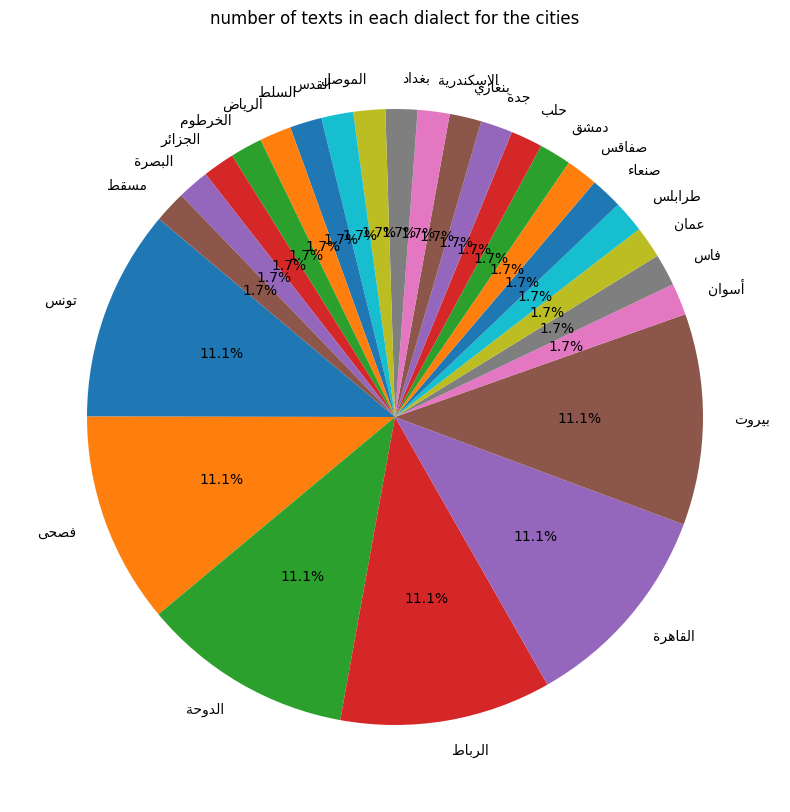

In [34]:
city_counts = data_trian_df.groupby('City')['sent'].count()
city_counts = city_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(city)) for city in city_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the cities")
plt.show()

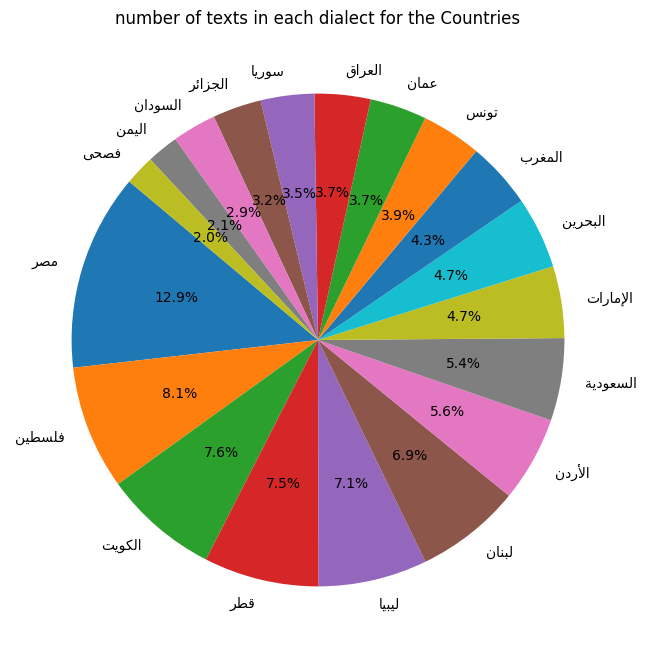

In [35]:
country_counts = data_trian_df.groupby('Country')['sent'].count()
country_counts = country_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(country)) for country in country_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Countries")
plt.show()

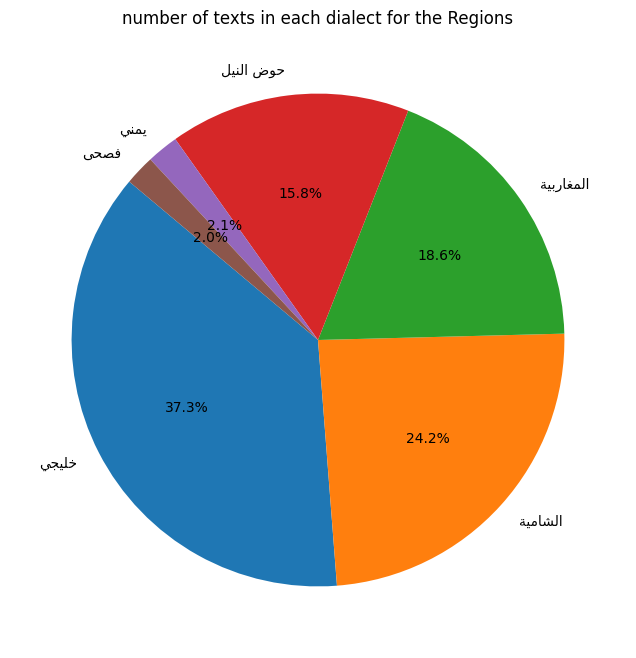

In [36]:
region_counts = data_trian_df.groupby('Region')['sent'].count()
region_counts = region_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Regions")
plt.show()

<div dir="rtl">
ŸÖŸÑÿßÿ≠ÿ∏ÿßÿ™ :<br>
ÿ≠ÿ≥ÿ® ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ (regions):<br>
- ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿÆŸÑŸäÿ¨Ÿäÿ© (glof) ÿ™ÿ≠ÿ™ŸàŸä ÿßŸÉÿ®ÿ± ŸÜÿ≥ÿ®ÿ© ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ŸÅŸä ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ 37.3% .<br>
-ŸáŸÜÿßŸÉ ŸÜŸÇÿµ ÿ®ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ŸÖÿ´ŸÑ ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸäŸÖŸÜŸä (yemen) ŸÅŸä ÿßŸÑÿØÿßÿ™ÿß .<br>
-ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∫ÿ±ÿ®ŸäŸëÿ© ŸàŸÖŸÜÿ∑ŸÇÿ© ÿ≠Ÿàÿ∂ ÿßŸÑŸÜŸäŸÑ ŸÑÿØŸäŸáÿß ŸÜÿ≥ÿ® ŸÖÿ™ŸÇÿßÿ±ÿ®ÿ© ÿ®ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿ∂ŸÖŸÜ ÿßŸÑÿØÿßÿ™ÿß .<br>
ÿ≠ÿ≥ÿ® ÿßŸÑÿ®ŸÑÿßÿØ (countries):<br>
- ÿ®ŸÑÿØ ŸÑŸäÿ®Ÿäÿß ŸáŸä ÿßŸÑÿßŸÉÿ´ÿ± ŸÖÿ≥ÿßŸáŸÖÿ© ÿ®ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿ∂ŸÖŸÜ ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®ŸäŸäÿ© ÿåÿßŸÖÿß ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ÿ≠Ÿàÿ∂ ÿßŸÑŸÜŸäŸÑ ŸÅÿπÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿ®ŸÑÿØ ŸÖÿµÿ± ŸáŸä ÿßŸÑÿßŸÉÿ´ÿ± ÿåŸàŸÅŸä ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ¥ÿßŸÖŸäŸäÿ© ÿ™ÿπÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿßŸÑŸÑÿ®ŸÜÿßŸÜ ŸàŸÅŸÑÿ≥ÿ∑ŸäŸÜ ÿßŸÑÿßŸÉÿ´ÿ± ÿπÿØÿØÿß ÿåŸàÿßÿÆŸäÿ±ÿß ŸÅŸä ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿÆŸÑŸäÿ¨Ÿäÿ© ÿßŸÑÿπÿØÿØ ÿßŸÑÿßŸÉÿ®ÿ± ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ŸäŸàÿ¨ÿØ ŸÅŸä ÿ®ŸÑÿØ ÿßŸÑŸÉŸàŸäÿ™ ŸàŸÇÿ∑ÿ± .<br>
- ÿ®ŸÑÿØ ÿßŸÑÿ¨ÿ≤ÿßÿ¶ÿ± ŸàÿπŸÖÿßŸÜ ŸäŸÖŸÑŸÉÿßŸÜ ÿπÿØÿØÿß ÿµÿ∫Ÿäÿ±ÿß ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ÿπŸÑŸâ ÿßŸÑÿ±ÿ∫ŸÖ ŸÖŸÜ ÿßŸÜÿ™ŸÖÿßÿ°ŸáŸÖ ÿßŸÑŸâ ŸÖŸÜÿ∑ŸÇÿ™ŸäŸÜ ÿ®ÿπÿØÿØ ŸÜÿµŸàÿµ ŸÉÿ®Ÿäÿ± ŸÜÿ≥ÿ®Ÿäÿß .<br>
ÿ≠ÿ≥ÿ® ÿßŸÑŸÖÿØŸÜ (cities) <br>
-ÿßŸÑŸÜÿµŸàÿµ ŸÑŸäÿ≥ÿ™ ŸÖŸàÿ≤ÿπÿ© ÿ®ÿßŸÑÿ™ÿ≥ÿßŸàŸä ÿ®ŸäŸÜ ÿßŸÑŸÖÿØŸÜ ÿ≠Ÿäÿ´ ŸäŸàÿ¨ÿØ Ÿ• ÿØŸàŸÑ ŸÅŸÇÿ∑ ÿ®ÿπÿØÿØ ŸÜÿµŸàÿµ ÿßŸÉÿ®ÿ± ÿßŸÖÿß ÿ®ŸÇŸäÿ© ÿßŸÑŸÖÿØŸÜ ŸÅÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÅŸäŸáÿß ÿµÿ∫Ÿäÿ± .<br>
ŸÖŸÖÿß ÿ≥ÿ®ŸÇ Ÿàÿ¨ÿØŸÜÿß ÿßŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ™ÿ∏Ÿáÿ± ÿ™ÿ±ŸÉŸäÿ≤ÿß ŸÅŸä ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÖÿØŸÜ ŸÖŸÖÿß Ÿäÿ¥Ÿäÿ± ÿßŸÑŸâ ÿ™Ÿàÿ≤ÿπ ÿ∫Ÿäÿ± ŸÖÿ™ÿ≥ÿßŸà .<br>
ÿßŸÑÿßÿ≠ÿ∏ ÿßŸäÿ∂ÿß ÿßŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÅŸä ÿØÿßÿ™ÿß ŸÖÿØÿßÿ± ÿ∫Ÿäÿ± ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ŸÅŸÇÿØ ÿ∏Ÿáÿ± ÿ∞ŸÑŸÉ ŸÅŸä ÿ™ŸÖÿ´ŸÑ ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ŸÑŸÉŸÑ ŸÖÿØŸäŸÜÿ© ÿ®ŸäŸÜŸÖÿß ŸÉÿßŸÜ ŸáŸÜÿßŸÉ ÿ™Ÿàÿßÿ≤ŸÜ ŸÜŸàÿπÿß ŸÖÿß ÿπŸÜÿØ ÿ™ŸÖÿ´ŸäŸÑ ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿπŸÑŸâ  ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿ®ŸÑÿßÿØ ÿßŸà ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ÿ≠Ÿäÿ´ ÿßŸÜ ÿØÿßÿ™ÿß ŸÉÿßÿØŸä ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ŸÜŸàÿπÿß ŸÖÿß ŸÑÿ∞ŸÑŸÉ ÿπŸÜÿØ ÿ¨ŸÖÿπŸáÿß ŸÖÿπ ÿØÿßÿ™ÿß ŸÖÿØÿßÿ± ŸÜÿ¨ÿØ ÿßŸÜ  ŸÜÿ≥ÿ®ÿ© ÿπÿØÿØ ÿßŸÑŸÜÿµŸàÿµ ÿ≠ÿ≥ÿ® ÿßŸÑÿ®ŸÑÿØÿßŸÜ ÿßŸà ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ÿßŸÑŸâ ÿ≠ÿØ ŸÖÿß ÿ≠Ÿäÿ´ ŸÑÿß ÿ™ÿ≥Ÿäÿ∑ÿ± ŸÖŸÜÿ∑ŸÇÿ© ÿßŸà ÿ®ŸÑÿØ ÿπŸÑŸâ ÿπÿØÿØ ŸÉÿ®Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿßŸÑÿ®ŸÑÿØÿßŸÜ ÿßŸà ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ÿßŸÑÿßÿÆÿ±Ÿâ   <br>
</div>

## [2.2]

In [37]:
def tokenize(text):
    tokens = wordpunct_tokenize(text)
    # arabic_tokens = [token for token in tokens if regex.match(r"^\p{IsArabic}+$", token)]
    return tokens

data_trian_df['tokens'] = data_trian_df['sent'].apply(tokenize)

all_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))

print(f"ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÉŸÑŸä (Total Tokens): {total_tokens}")
print(f"ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÅÿ±ŸäÿØÿ© (Vocab Tokens): {unique_tokens}")


ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÉŸÑŸä (Total Tokens): 8466370
ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÅÿ±ŸäÿØÿ© (Vocab Tokens): 739865


In [38]:
data_trian_df.head()

split  \
0  corpus-6-test-corpus-26-train   
1  corpus-6-test-corpus-26-train   
2  corpus-6-test-corpus-26-train   
3  corpus-6-test-corpus-26-train   
4  corpus-6-test-corpus-26-train   

                                           sent   Region Country  City  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü  ÿßŸÑÿ¥ÿßŸÖŸäÿ©   ÿ≥Ÿàÿ±Ÿäÿß  ÿØŸÖÿ¥ŸÇ   

                                              tokens  
0  [ŸÖŸàÿ¨ŸàÿØ, ŸáŸÜŸäŸÉ, ÿå, ŸÇÿØÿßŸÖ, ŸÖŸÉÿ™ÿ®, ŸÖÿπŸÑŸàŸÖÿßÿ™, ÿßŸÑÿ≥Ÿäÿßÿ≠, ...  
1           [ŸÖÿß, ÿ≥ŸÖÿπÿ™, ÿ®ŸáŸäŸÉ, ÿπŸÜŸàÿßŸÜ, ŸáŸàŸÜ, ŸÖŸÜ, ŸÇÿ®ŸÑ, .]  
2           [ÿ•ŸÖÿ¥Ÿä, ŸÖÿ®ÿßÿ¥ÿ±ÿ©, ŸÑÿ≠ÿØ, ŸÖÿß, ÿ™ÿ¥ŸàŸÅ, ÿµŸäÿØŸÑŸäÿ©, .]  
3                                 [ÿ®ÿ£ÿØŸäÿ¥, ÿßŸÑŸÅÿ∑Ÿàÿ±, ÿü]  
4                              [ŸÉŸäŸÅ, ŸÅŸäŸÜŸä, ÿ≥ÿßÿπÿØŸÉ, ÿü]

## [2.3]

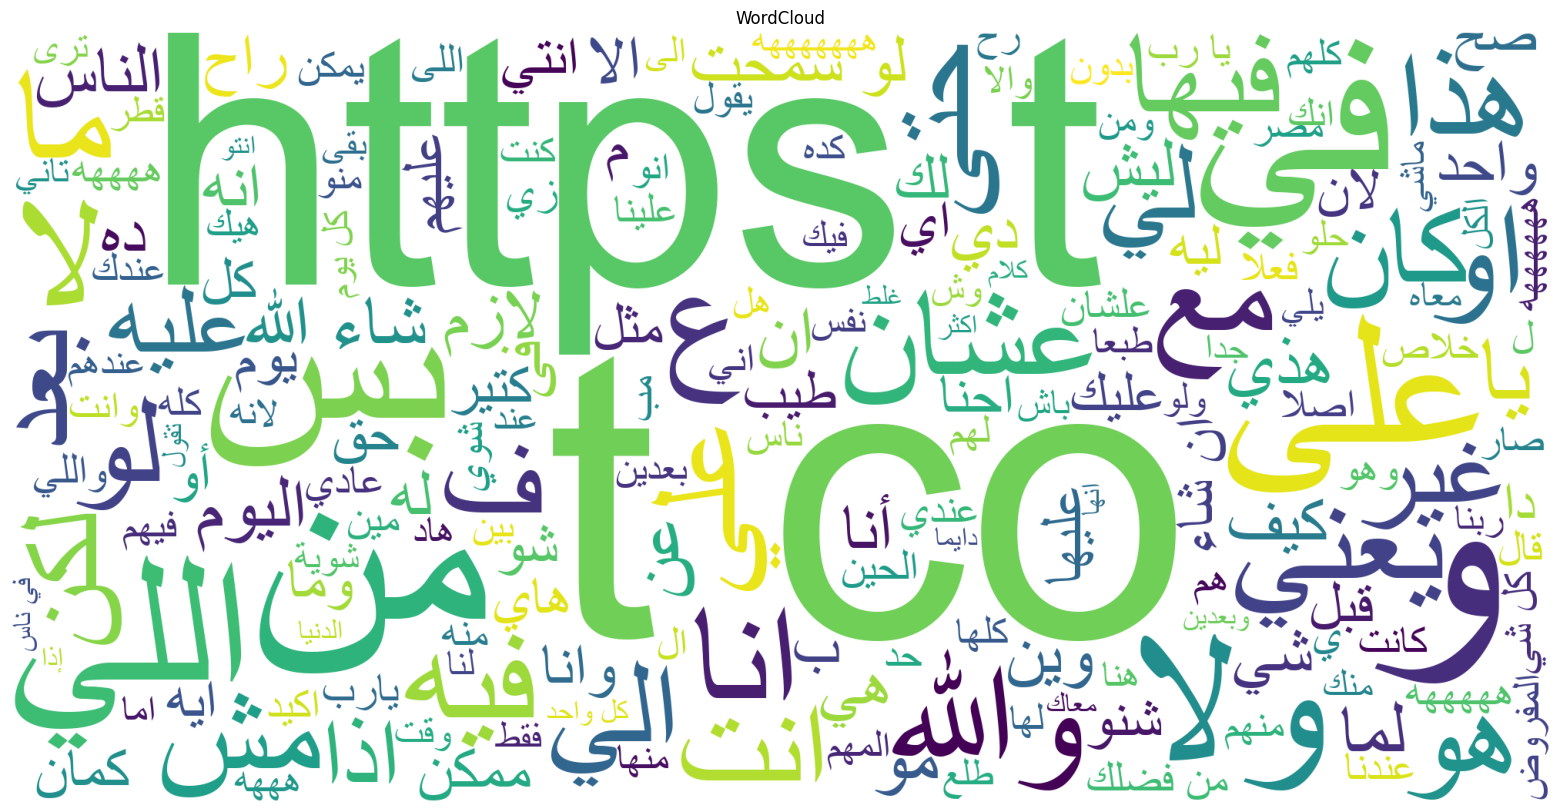

In [ ]:
arabic_tokens = []
other_tokens = []
def is_arabic(text):
    return regex.match(r"^\p{IsArabic}+$", text) is not None
for token in all_tokens:
    if is_arabic(token):
        arabic_tokens.append(token)
    else:
        other_tokens.append(token)

arabic_text = ' '.join(arabic_tokens)
reshaped_text = arabic_reshaper.reshape(arabic_text)
processed_arabic_text = get_display(reshaped_text)

final_text = processed_arabic_text + ' ' + ' '.join(other_tokens)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(final_text)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

# plt.figure(figsize=(20, 10))
# plt.title("WordCloud")
# plt.imshow(wordcloud)
# plt.axis("off")
# wordcloud_path = "wordcloud_output1.png"  # ÿßÿ≥ŸÖ ŸÖŸÑŸÅ ÿßŸÑÿµŸàÿ±ÿ©
# plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')  # ÿßŸÑÿ≠ŸÅÿ∏ ÿ®ÿ¨ŸàÿØÿ© ÿπÿßŸÑŸäÿ©
# plt.show()
# print(f"ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ŸÅŸä: {wordcloud_path}")


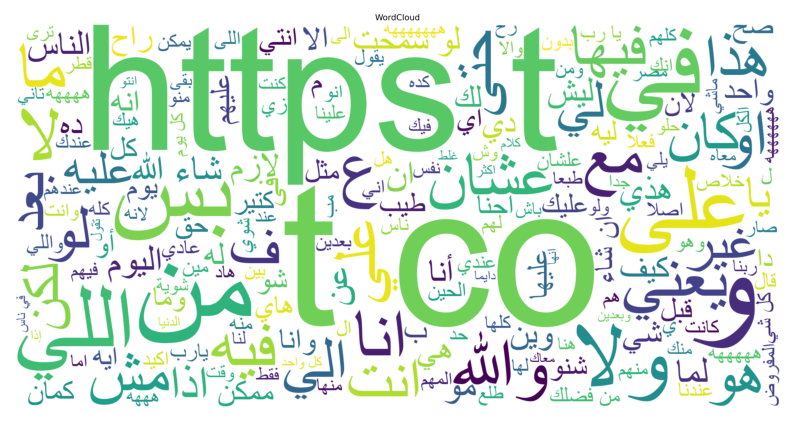

In [ ]:
img = plt.imread("wordcloud_output1.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑŸÖÿ≠ÿßŸàÿ±
plt.show()

ÿ®ÿπÿØ ŸÇÿ±ÿßÿ°ÿ© ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸÑŸÜÿßÿ™ÿ¨ Ÿàÿ¨ÿØŸÜÿß ÿßŸÜ ÿßŸÑÿØÿßÿ™ÿß ÿ™ÿ≠ŸàŸä ÿπŸÑŸâ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ ÿ≠Ÿäÿ´ ÿ™ÿ≠ÿ™ŸÑ ŸÉŸÑŸÖÿ© (https) ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿßŸÉÿ®ÿ± ŸÖŸÜ ÿßŸÑÿ±ÿ≥ŸÖ .
ŸÉŸÖÿß ÿßŸÜ ŸáŸÜÿßŸÉ ÿßŸÑÿπÿØŸäÿØ ŸÖŸÜ ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿ¥ÿ∫ŸÑ ŸÖÿ≥ÿßÿ≠ÿ© ŸÖŸÜ ÿßŸÑÿ±ÿ≥ŸÖ Ÿàÿ™ÿ™ŸÅÿßŸàÿ™ ŸÜÿ≥ÿ®ÿ© ÿ™ÿ™ŸÉÿ±ÿßÿ±Ÿáÿß ŸÑÿ∞ÿß ŸÖŸÜ ÿßŸÑŸÖŸáŸÖ ÿßÿÆÿ∞Ÿáÿß ŸÅŸä ÿπŸäŸÜ ÿßŸÑÿßÿπÿ™ÿ®ÿßÿ± ŸàÿßÿÆÿ™ÿ®ÿßÿ± ÿßŸÜ ŸÉÿßŸÜÿ™ ÿßÿ≤ÿßŸÑÿ™Ÿáÿß ÿ≥ÿ™ÿ≠ÿ≥ŸÜ ŸÖŸÜ ÿßÿØÿßÿ° ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ÿßŸÖ ŸÑÿß .
ŸÉŸÖÿß ŸÜŸÑÿßÿ≠ÿ∏ ÿßŸÜ ÿ≥ŸÑÿ≥ŸÑÿ© ÿßŸÑÿ≠ÿ±ŸàŸÅ ÿßŸÑÿ™Ÿä ÿ™ÿπÿ®ÿ± ÿπŸÜ ÿßŸÑÿ∂ÿ≠ŸÉ (ŸáŸáŸáŸáŸá) ŸÇÿØ Ÿàÿ±ÿØÿ™ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ ŸÖÿ±ÿ© ÿØÿßÿÆŸÑ ÿßŸÑÿ±ÿ≥ŸÖ ÿßŸäÿ∂ÿß ŸäŸÖŸÉŸÜ ÿßŸÑŸÜÿ∏ÿ± ŸÅŸä ÿßŸÖŸÉÿßŸÜŸäÿ© ÿßÿ≤ÿßŸÑÿ™Ÿáÿß ŸÖÿ≥ÿ™ŸÇÿ®ŸÑÿß  ŸÜÿ±Ÿâ ÿßŸÜŸáÿß ŸÇÿØ ŸÑÿß ÿ™ÿ≥ÿßÿπÿØ ŸÅŸä ÿ™ÿ≠ÿØŸäÿØ ŸÑŸáÿ¨ÿ© ŸÑÿ®ŸÑÿØ ÿßŸà ŸÖŸÜÿ∏ŸÇÿ© ŸÖÿπŸäŸÜÿ©.

## [2.4]

In [39]:
def get_most_common_words(tokens, n=10):
    """Return the n most common words."""
    word_freq = FreqDist(tokens)
    return word_freq.most_common(n)

def get_hapaxes(tokens, n=10):
    """Return the first n hapaxes (words that appear only once)."""
    word_freq = FreqDist(tokens)
    hapaxes = [word for word in word_freq.hapaxes()]
    return hapaxes[:n]

def get_most_common_bigrams(tokens, n=10):
    """Return the n most common bigrams."""
    bigram_freq = FreqDist(bigrams(tokens))
    return bigram_freq.most_common(n)

def get_most_common_trigrams(tokens, n=10):
    """Return the n most common trigrams."""
    trigram_freq = FreqDist(trigrams(tokens))
    return trigram_freq.most_common(n)

def get_most_important_bigrams(tokens, n=10):
    """Return the n most important bigrams using PMI."""
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    return bigram_finder.nbest(BigramAssocMeasures().pmi, n)

def get_most_important_trigrams(tokens, n=10):
    """Return the n most important trigrams using PMI."""
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    return trigram_finder.nbest(TrigramAssocMeasures().pmi, n)


In [40]:
def analyze_texts(dataframe, column='City', n=10):
    """Analyze texts and print results for each city."""
    city_tokens = {}

    for index, row in dataframe.iterrows():
        label = row[column]
        tokens = row['tokens']
        if pd.isna(label):
            continue
        if label not in city_tokens:
            city_tokens[label] = []
        city_tokens[label].extend(tokens)


    for city, tokens in city_tokens.items():
        most_common = get_most_common_words(tokens, n)
        hapaxes = get_hapaxes(tokens, n)
        most_common_bigrams = get_most_common_bigrams(tokens, n)
        most_common_trigrams = get_most_common_trigrams(tokens, n)
        most_important_bigrams = get_most_important_bigrams(tokens, n)
        most_important_trigrams = get_most_important_trigrams(tokens, n)


        print(f"=== Results for {city} ===")
        print("Most Common Words: ", ', '.join([f"{word} ({count})" for word, count in most_common]))
        print("Hapaxes: ", ', '.join(hapaxes))
        print("Most Common Bigrams: ", ', '.join([f"{' '.join(bigram)} ({count})" for bigram, count in most_common_bigrams]))
        print("Most Common Trigrams: ", ', '.join([f"{' '.join(trigram)} ({count})" for trigram, count in most_common_trigrams]))
        print("Most Important Bigrams: ", ', '.join([' '.join(bigram) for bigram in most_important_bigrams]))
        print("Most Important Trigrams: ", ', '.join([' '.join(trigram) for trigram in most_important_trigrams]))
        print("=" * 50)


In [41]:
analyze_texts(data_trian_df)

=== Results for ÿØŸÖÿ¥ŸÇ ===
Most Common Words:  . (1204), ÿü (675), ÿå (392), ÿ®ÿØŸä (144), ŸÖŸÖŸÉŸÜ (134), ŸÖŸÜ (124), ÿ≥ŸÖÿ≠ÿ™ (117), ŸÑŸà (113), ÿπŸÑŸâ (103), ŸáÿßÿØ (102)
Hapaxes:  ÿßŸÑÿ≥Ÿäÿßÿ≠, ÿ®ÿßŸÑÿ≤ÿ®ÿ∑, ÿ≥ŸÖÿπÿ™, ÿ®ŸáŸäŸÉ, ÿ•ŸÖÿ¥Ÿä, ÿ™ÿµÿ±ŸÅŸÑŸä, ÿ£ÿ∑ŸÅÿßŸÑ, Ÿàÿ≤ŸäÿßÿØÿ©, ÿ®ÿßŸÑÿ∏ÿ®ÿ∑, ŸÑŸÑÿ™ŸàÿµŸäŸÑ
Most Common Bigrams:  ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ (106), ÿå ŸÑŸà (94), ÿ≥ŸÖÿ≠ÿ™ . (88), . ŸÖŸÖŸÉŸÜ (76), . ÿ®ÿØŸä (76), ÿü ÿ®ÿØŸä (51), ÿ±ÿ¨ÿßÿ° Ÿã (48), . ÿ±ÿ≠ (47), . ŸÅŸä (35), ÿü ŸÖŸÖŸÉŸÜ (34)
Most Common Trigrams:  ÿå ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ (89), ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ . (78), . ÿ±ÿ¨ÿßÿ° Ÿã (27), ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ ÿü (23), . ÿßŸä ÿå (19), . ÿ¥ŸÉÿ±ÿß Ÿã (15), ŸÖŸÜ ŸáŸàŸÜ ÿü (15), . ŸÖŸÖŸÉŸÜ ÿ™ÿπÿ∑ŸäŸÜŸä (14), ÿ•ÿ∞ÿß ÿ®ÿ™ÿ±ŸäÿØ . (13), ÿü ÿ±ÿ¨ÿßÿ° Ÿã (13)
Most Important Bigrams:  ÿ£ŸÉÿØ ÿ±ÿ≠ŸÑÿ™Ÿä, ÿ£Ÿàÿ™ŸäŸÑÿßÿ™ ÿ±ÿÆŸäÿµÿ©, ÿßŸÑÿ≠Ÿä ÿßŸÑÿµŸäŸÜŸä, ÿ®ÿ¥ÿ™ÿ∫ŸÑ ÿ®ÿ¥ÿ±ŸÉÿ©, ÿ™ŸÜÿßŸàŸÑŸÜŸä ÿßŸÑŸÖŸÑÿ≠, ÿ≠ÿØŸäŸÇÿ© ÿßŸÑÿ≠ŸäŸàÿßŸÜÿßÿ™, ÿØÿ±ÿ¨ ÿßŸÑŸÉŸáÿ±ÿ®ÿß, ŸÉÿ±ŸäŸÖÿß Ÿàÿ≥ŸÉÿ±, ŸÑÿßÿ≥ ŸÅŸäÿ∫ÿßÿ≥, ŸÑŸàÿ≥ ÿ£ŸÜÿ¨ŸÑŸàÿ≥
Mo

In [42]:
analyze_texts(data_trian_df,"Country")

=== Results for ÿ≥Ÿàÿ±Ÿäÿß ===
Most Common Words:  @ (12966), . (6785), ŸÖŸÜ (3428), / (2925), ŸÖÿß (2786), t (2771), :// (2769), co (2769), # (2275), ÿ®ÿ≥ (2077)
Hapaxes:  ÿ•ŸÖÿ¥Ÿä, Ÿàÿßÿ¨Ÿá, ÿßŸÑÿ¨ŸÖÿßÿ±ŸÉ, ŸÑŸÑÿ±ÿ¨ŸÑŸäŸÜ, ÿßŸÑÿπÿ±ÿßÿ∂, ÿßŸÑŸÅÿ±ÿØŸä, ÿ∂ŸäŸÇ, ÿ™ÿ≥ÿÆŸÜŸá, ÿ®ÿ±ŸÅŸäŸÇŸä, ŸÖÿÆÿµÿµÿ©
Most Common Bigrams:  :// t (2769), t . (2769), . co (2769), co / (2769), https :// (1764), http :// (1005), ... http (473), ... https (361), . @ (259), @ hamodax (248)
Most Common Trigrams:  :// t . (2769), t . co (2769), . co / (2769), https :// t (1764), http :// t (1005), ... http :// (473), ... https :// (361), ÿßÿπÿ™ŸÇŸÑŸàŸá ÿßŸÑÿπŸÅÿßÿ±Ÿäÿ™ ÿßŸÑÿ≤ÿ±ŸÇ (183), ÿå ÿ•ÿ∞ÿß ÿ≥ŸÖÿ≠ÿ™ (146), # Ÿäÿßÿßÿßÿ≠ÿ±Ÿäÿ© .. (140)
Most Important Bigrams:  Salah HA, Touch Bar, am sam, k√§nner sig, last seen, sig √§lskad, ÿßÿÆŸÄÿ± ŸÖŸÄÿ±Ÿá, ÿßÿ≤ÿ±ÿπŸàŸáÿß ÿ®ÿØŸÇŸÜ, ÿßŸÑÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿ±ÿ≥ŸÖŸäÿ©, ÿßŸÑÿßŸÇŸäŸáÿß ÿ¨ŸÖÿ®Ÿä
Most Important Trigrams:  k√§nner sig √§lskad, ÿßŸÑÿπÿØ ÿßŸÑÿ™ŸÜÿßÿ≤ŸÑŸä ŸÑŸÜŸáÿßŸäÿ©,

In [43]:
analyze_texts(data_trian_df,"Region")

=== Results for ÿßŸÑÿ¥ÿßŸÖŸäÿ© ===
Most Common Words:  @ (87043), . (41095), ŸÖÿß (26034), ŸÖŸÜ (22288), / (16655), t (16159), :// (16144), co (16144), ÿ®ÿ≥ (15770), ÿå (15688)
Hapaxes:  ŸÑŸÑÿ±ÿ¨ŸÑŸäŸÜ, ÿ®ÿ±ŸÅŸäŸÇŸä, ÿßÿ≥ÿ¢ŸÑ, ÿßŸÑŸÉŸÖÿßŸÑÿ©, ÿπÿßŸÑÿßÿ¨ÿ±ÿßÿ°ÿßÿ™, ÿ®ŸÖÿ¨ŸÑÿ™ŸÜÿß, ŸÖÿ≠ÿßÿ±, ÿ∑ÿπŸÖÿ™Ÿá, ÿßÿ™ÿØŸàÿ±, ÿßÿ™ŸÜÿ≤ŸÑ
Most Common Bigrams:  :// t (16144), t . (16144), . co (16144), co / (16144), https :// (14537), üòÇ @ (2272), . @ (1951), http :// (1607), üòÇüòÇ @ (1275), Ÿäÿß ÿ±ÿ® (1260)
Most Common Trigrams:  :// t . (16144), t . co (16144), . co / (16144), https :// t (14537), http :// t (1607), ... https :// (1023), ... http :// (665), ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá (611), ÿå ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ (504), üòÇ https :// (479)
Most Important Bigrams:  Baasha Tafasilak, Ca va, Fatma Amin, Hussein Shejaeya, ID 5192090817, Najwa Karam, Nizar Francis, Rand Moh, Touch Bar, Visca barca
Most Important Trigrams:  k√§nner sig √§lskad, pa tu manaa, ÿßŸÇÿ±ÿßÿ®ŸÉ ŸàŸÑÿ≠ŸÖŸÉ ŸàÿØŸÖŸÉ, ÿ®ÿ™ÿßÿ±ŸäÿÆŸáÿß ŸàŸ

ŸÑÿßÿ≠ÿ∏ŸÜÿß ÿßŸÜŸá ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿßŸÉÿ´ÿ± ÿ™ŸÉÿ±ÿßÿ±ÿß ÿßŸà ÿßŸÑÿ´ŸÜÿßÿ¶ÿ≥ÿßÿ™ ŸàÿßŸÑÿ´ŸÑÿßÿ´Ÿäÿßÿ™ ÿ™ÿ∏Ÿáÿ± ŸÅŸäŸáÿß ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ŸàŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ Ÿàÿ®ÿßŸÑÿßÿ∂ÿßŸÅÿ© ŸÑŸÑÿ±Ÿàÿßÿ®ÿ∑ ŸàÿßŸÑÿ±ŸÖŸàÿ≤ ÿßŸÖÿß ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸÑÿ´ŸÜŸÜÿßÿ¶Ÿäÿßÿ™ ŸàÿßŸÑÿ´ŸÑÿßÿ´Ÿäÿßÿ™ ÿßŸÑŸÖŸáŸÖÿ© ŸàÿßŸÑÿßŸÉÿ´ÿ± ÿ™ŸÉÿ±ÿßÿ±ÿß ŸÅÿßŸÜŸÜÿß ŸÜŸÑÿßÿ≠ÿ∏ Ÿàÿ¨ŸàÿØ  ŸÉŸÑŸÖÿßÿ™ ŸÖÿπÿ®ÿ±ÿ© ÿßŸà ŸÖÿ™ÿ±ÿßÿ®ÿ∑ÿ© ÿπŸÑŸâ ÿπŸÉÿ≥ ÿßŸÑÿ´ŸÜÿßÿ¶Ÿäÿßÿ™ ÿßŸÑÿßŸÉÿ´ÿ± ÿ™ŸÉÿ±ÿßÿ±ÿß ÿ≠Ÿäÿ´ ŸäŸàÿ¨ÿØ ŸÉŸÑŸÖÿ© ŸÖÿπ ŸÅÿßÿµŸÑÿ© Ÿà ÿ±ŸÖÿ≤ .

## [2.5]

In [44]:


def find_distinctive_words(dataframe, column='City', threshold=10):
    dialect_words = {}
    all_words = set()
    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
    distinctive_words = {
        dialect: {
            word: count
            for word, count in dialect_words[dialect].items()
            if count >= threshold and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }
        for dialect in dialect_words
    }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda x: x[1]))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("ŸÑÿß ÿ™Ÿàÿ¨ÿØ ŸÉŸÑŸÖÿßÿ™ ŸÖŸÖŸäÿ≤ÿ© ÿ™ÿ™ÿ¨ÿßŸàÿ≤ ÿßŸÑÿπÿ™ÿ®ÿ© ÿßŸÑŸÖÿ≠ÿØÿØÿ©")

    return distinctive_words_sorted

In [45]:
c=find_distinctive_words(data_trian_df,"City",3)


ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿØŸÖÿ¥ŸÇ:
ÿ®ÿ¥ÿßŸÜ (3), ÿ¥ŸÜÿ™ÿßŸäÿ™ (3), ÿßŸÉÿ™Ÿàÿ® (3), ŸÑŸäŸÉŸá (4), ŸÖÿπŸÜÿßÿ™Ÿáÿß (6), ŸáŸàÿ© (25)

ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿßŸÑŸÇÿØÿ≥:
ÿ¨ÿ±ÿ≤ÿ© (3), ÿßÿ≠ÿØÿßÿπÿ¥ (3), ÿ™ÿßÿπÿ™ŸÉ (3), ŸÑÿßŸäŸÖÿ™ÿß (3), ÿ£ÿ≥ÿ™ÿ¶ÿ¨ÿ± (3)

ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿ£ÿ≥ŸàÿßŸÜ:
ÿπÿßŸäÿ≤ŸÜŸâ (3), ŸÖÿ™ŸÉŸÜÿ¥ (3), ŸÖÿ™ŸáŸäÿ¶ŸÑŸâ (3), ŸÖÿ™ÿπÿ±ŸÅÿ¥ (3), ŸäŸÜÿπŸÑ (3), ÿ™ÿ≥ÿπŸÖÿßŸäÿ© (3), ÿ•ŸÖŸÑŸâ (3), ÿ¨ÿØÿ¢ (4), ÿ•ŸÜŸáÿßÿ±ÿØÿ© (5), Ÿáÿ®ŸÇŸâ (5), ÿπŸÜÿØŸäŸÜÿß (6), ÿ¢ÿ¨ÿ± (7), ŸÖÿ™ŸáŸäÿ¶ŸÑŸä (9)

ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿßŸÑŸÖŸàÿµŸÑ:
ÿ™ÿ∫ŸäÿØŸÜŸä (3), ÿπÿ¥ÿ∫ (3), ÿ∫ÿ¨ÿßŸÑ (3), ÿ≠Ÿàÿßÿ≥ (3), ŸÉÿ®Ÿäÿ∫ (3), ÿßŸÑÿ¨ŸÜÿ∑Ÿá (3), ÿßŸÑÿ∏Ÿáÿ∫ (3), ÿßÿ¥ŸÜŸä (3), Ÿäÿ∑ŸäŸÇ (3), ÿµÿ∫Ÿäÿ∫Ÿä (3), ÿßÿÆÿ∞Ÿà (3), ŸäÿµŸäÿ∫ (3), ÿ∫ÿßÿ≥ (3), ÿ™ÿ¥ÿ∫ÿ® (3), ÿßŸÑÿßÿ≠ÿ≥ŸÜŸÑŸÉ (3), ŸÑŸáŸÑ (3), ŸàŸÇÿπÿ™Ÿà (3), ŸÑŸÑÿßÿπŸÑŸâ (3), ÿßÿ™ÿ∫ŸäÿØ (3), ŸáŸäÿßŸÜŸà (3), ÿ¥Ÿáÿ∫ (3), ŸÖÿπÿßŸÜŸá (3), ÿßÿ±ÿ≥ŸÑŸà (3), ÿ®Ÿäÿ∫ÿØŸä (3), Ÿàÿ™ÿ≥ÿπŸÖŸä (3)

In [46]:
co=find_distinctive_words(data_trian_df,"Country",10)


ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿ≥Ÿàÿ±Ÿäÿß:
suaad_syr (10), ŸÑÿßŸÜŸà_ŸÖÿß_ÿ®ÿπÿ±ŸÅ_ÿ¥Ÿà_ÿ®ÿØŸä (10), Shb34a (10), MTulimat (10), almadinafmsyria (10), ÿ¶ŸÑŸä_ŸÑÿß_ÿ™ÿ≥ÿ±ÿ¶Ÿáÿß (10), mousa_m_agha (10), anasimam77 (10), Hiba_alshamsy (10), abah07 (10), HIBA_1984 (10), abojony89 (10), ssss0019871 (10), farahmaarouf3 (10), asseraaalsham (10), ÿ£ŸÜÿß_ÿßŸÑŸäÿ±ŸÖŸàŸÉ (10), abdullahojd (10), ÿ¥ŸÜÿ™ÿßŸäÿ© (11), secureuser1 (11), RubaSyrian (11), ramashahid0 (11), lama_khashi (11), Ÿäÿßÿßÿßÿßÿ≠ÿ±Ÿäÿ© (11), MustafaSejari (11), rosemar3ee (11), ŸÉŸàÿ±ÿØŸäŸÑŸÑŸà (11), shaza_meh (11), SamoraBrd (11), kramgood (11), o0_0oShaamo0_0o (11), ramroom_homs (11), SanaTabbaa (11), SibaiAbdul (11), But_Not_Me (11), ÿ®ÿßŸÑÿ∫Ÿàÿ∑ÿ© (11), doncattivo (11), AN_SYR (11), ŸÅŸÜŸÜŸÜŸÜŸÜŸÜ (11), sma172 (12), 20_o_20_o (12), Darin_ALabdalla (12), sousoum (12), ÿ¶ŸÑŸÉ (12), mwlnecodqpmz (12), WoRoudsy (12), eje_bh (12), Fahaad__ksa (12), 92hasson (12), majed_abdalnoor (13), molhamteam (13), 1983 (13), Kalmuq

In [47]:
re=find_distinctive_words(data_trian_df,"Region",20)


ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ŸÅŸä ŸÑŸáÿ¨ÿ© ÿßŸÑÿ¥ÿßŸÖŸäÿ©:
ÿ±ŸÅŸÇÿßÿ™Ÿä (20), ÿπÿßŸÑÿØÿ±ÿ¨ (20), ÿ¥ŸÜÿ∑ÿßÿ™Ÿä (20), ŸÖŸÜÿ≠ŸÉŸä (20), ZooZGooV (20), ÿßŸÑÿØÿ±ŸÉŸä (20), besobasil_go (20), SabbaghManar (20), MadridFatma (20), yousefmohabbash (20), ZAlomoush (20), MohammedEHamma1 (20), donahmad154 (20), ibcio (20), aboodkattan (20), starXsally (20), FadiAlMasri1 (20), wisso220 (20), Alaa_Abu_Hassan (20), nouar_sa (20), ŸÇŸàŸÑ_ÿ¥Ÿä_ŸÑŸÑÿ≥ÿπÿØ (20), dam3a999999 (20), Berry___H (20), osamayazori (20), RayaSeifan (20), sama_alshami22 (20), ÿßŸÑŸÉŸÜ (20), mloMie5RiDtcRdr (20), mokh199 (20), ŸÉÿ®ÿ¥ÿ© (20), wehby_Abeer (20), farahmohamad743 (20), FaridMy67 (20), moatazbasbuos (20), ÿ¥ŸàÿßŸä (20), niBCS2KmY7 (20), Alaa_Qatawneh (20), amalAldoghmi (20), hallal__ (20), zeyad_alhassan (20), Hanadi75660899 (20), good222333 (20), DaniaFreind (20), ÿπÿßŸÑŸÖÿ≠ÿ∑ÿ© (21), ÿ£ŸÖÿ™ŸäŸÜ (21), ÿ®ÿµŸäÿ±Ÿàÿß (21), SRAXfjKpW7 (21), OHMYJAD (21), ÿ≥ŸÜÿßÿ®ÿßÿ™_ÿ®ŸÑÿßŸÑ_ÿßŸÑŸÖÿßÿ∂Ÿä (21), Oks_657 (21), ÿßŸÑÿ≥ŸäÿØ_Ÿ

ŸÇŸÖŸÜÿß ÿ®Ÿàÿ∂ÿπ ÿ≠ÿØ ÿµÿ∫Ÿäÿ± ÿπŸÜÿØ ÿßŸäÿ¨ÿßÿØ ÿßŸÑŸÉÿ®ŸÖÿßÿ™ ÿßŸÑŸÖŸÖŸäÿ≤ÿ© ÿ®ÿßŸÑŸÖÿØŸÜ ÿ®ÿ≥ÿ®ÿ® Ÿàÿ¨ŸàÿØ ŸÖÿØŸÜ  ŸÉÿ´Ÿäÿ±ÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÜÿµŸàÿµ .


## [2.6]

In [ ]:
def generate_ngrams(text, n=3):
    tokens = text.split()
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
def calc_similarity (df,lable,n):

    df['ngrams'] = df['sent'].apply(lambda x: generate_ngrams(x, n))

    grouped = df.groupby(lable)['ngrams'].sum()
    grouped = grouped.apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(grouped)

    similarity_matrix = cosine_similarity(X)

    lables = grouped.index
    similarity_df = pd.DataFrame(similarity_matrix, index=lables, columns=lables)

    plt.figure(figsize=(10, 8))

    reshaped_lables = [get_display(arabic_reshaper.reshape(lable)) for lable in lables]

    sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
                xticklabels=reshaped_lables, yticklabels=reshaped_lables, annot_kws={"size":8})
    plt.title(f"Similarity between Dialects : ({lable})")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

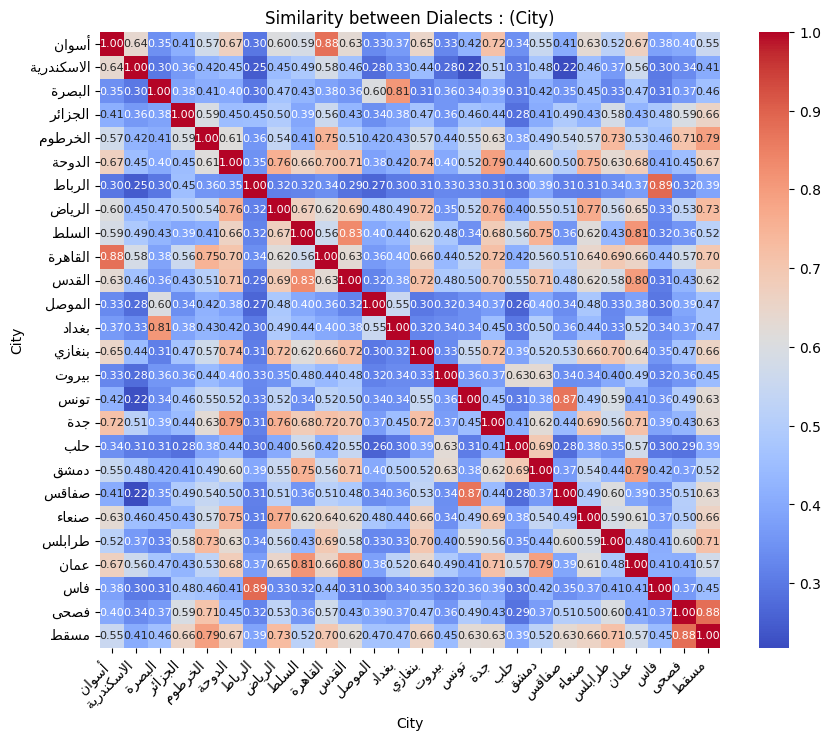

In [ ]:
calc_similarity(data_trian_df,"City",3)

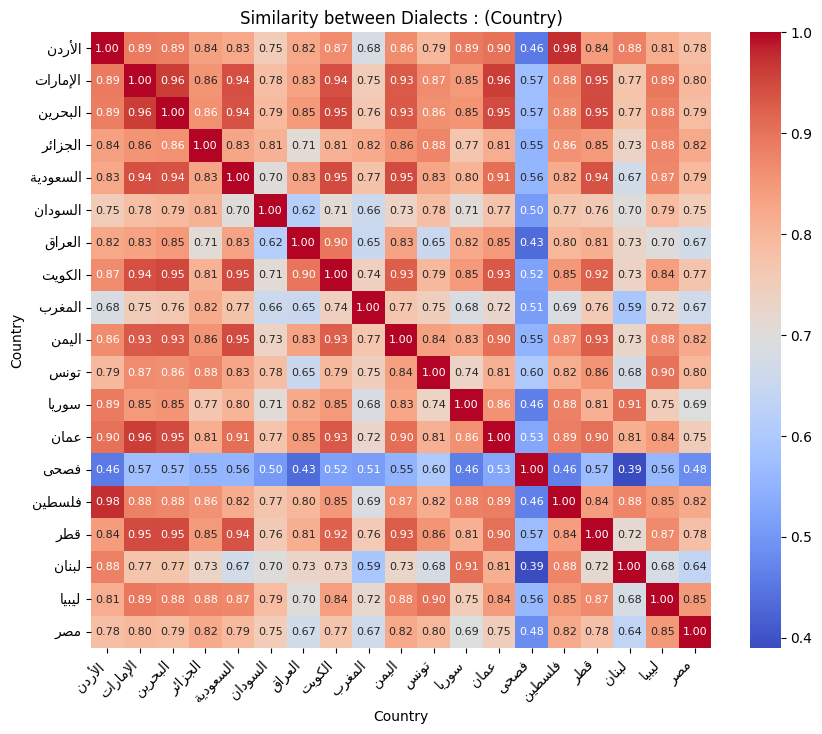

In [ ]:
calc_similarity(data_trian_df,"Country",20)

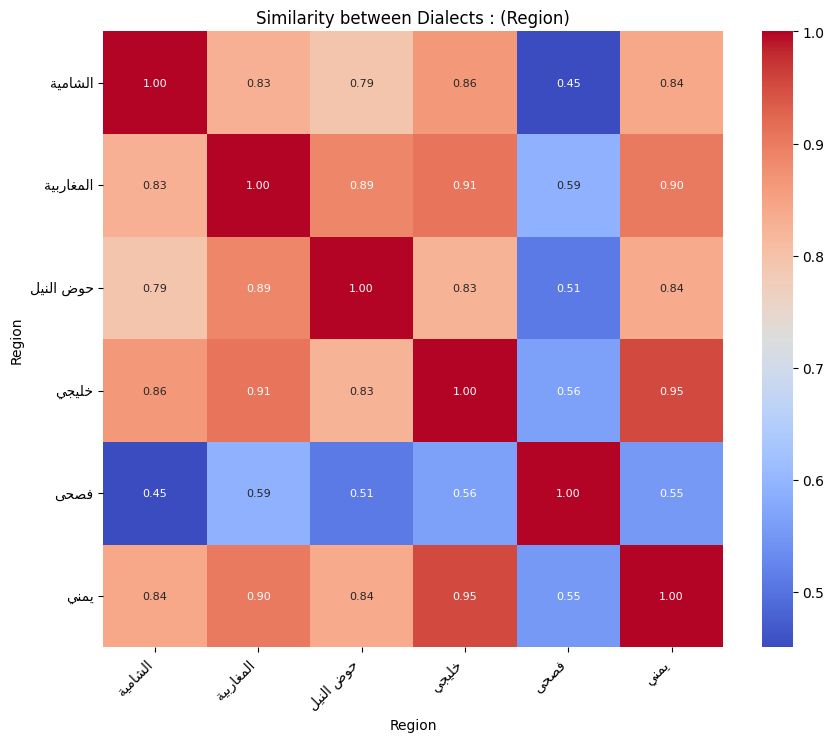

In [ ]:
calc_similarity(data_trian_df,"Region",20)

ŸÑÿßÿ≠ÿ∏ŸÜÿß ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ ÿπŸÜÿØ ŸÖŸÇÿßÿ±ŸÜÿ© ÿßŸÑŸÑŸáÿ¨ÿßÿ™ ÿ®ŸäŸÜ ÿßŸÑŸÖÿØŸÜ ŸÅŸÜÿ¨ÿØ ÿßŸÜ ÿπÿØÿØ ŸÇŸÑŸäŸÑ ŸÖŸÜŸáÿß ŸÅŸÇÿ∑ ŸÖÿ™ŸÇÿßÿ±ÿ® ÿ®ŸäŸÜ ÿ®ÿπÿ∂Ÿáÿß ÿßŸÖÿß ÿπŸÜÿØ ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ÿßŸÑÿ®ŸÑÿØÿßŸÜ ŸÅŸÜÿ¨ÿØ ÿßŸÜ ÿßŸÑÿ™ŸÇÿßÿ±ÿ® ÿ®ŸäŸÜ ÿßŸÑŸÑŸáÿ¨ÿßÿ™ ÿßŸÉÿ®ÿ± Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿ®ŸäŸÜ ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ ÿ≠Ÿäÿ´ ŸÉŸÑ ŸÖŸÜÿ∑ŸÇÿ© ÿ™ÿ≠ÿ™ŸàŸä ÿßŸÑÿπÿØŸäÿØ ŸÖŸÜ ÿßŸÑÿØŸàŸÑ ŸÖŸÖÿß ŸäŸÜÿ™ÿ¨ ÿπŸÜŸá ÿ™ŸÇÿßÿ±ÿ® ŸÑŸÑŸáÿ¨ÿßÿ™ ÿ®ŸäŸÜ ÿßŸÑŸÖŸÜÿßÿ∑ŸÇ , ŸàÿßŸäÿ∂ÿß ŸÑÿßÿ≠ÿ∏ŸÜÿß ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ© ÿßŸÑŸÅÿµÿ≠Ÿâ ÿ™ÿ∏Ÿáÿ± ÿ™ÿ®ÿßÿπÿØÿß ÿπŸÜ ÿßŸÑŸÑŸáÿ¨ÿßÿ™ ÿßŸÑÿßÿÆÿ±Ÿâ ŸÅŸä ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖÿ≥ÿ™ŸàŸäÿßÿ™ .

## [2.7]

In [ ]:
# !wget https://archive.org/download/arabic_corpus/vectors.txt.xz
# !xz -d vectors.txt.xz

In [ ]:
embeddings_index = {}
with open('vectors.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:pass


train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in embeddings_index:
        oov_words += 1
oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 474341
Total number of unique words in training data: 739865
OOV rate: 64.11%


In [ ]:
import fasttext

model_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz"
model_filename = "cc.ar.300.bin"

import os
if not os.path.exists(model_filename):
    print("Downloading the FastText model...")
    !wget {model_url}
    !gunzip cc.ar.300.bin.gz
    print("Model downloaded successfully.")
else:
  print("Model already exists.")


Model already exists.


In [ ]:
ft_model = fasttext.load_model(model_filename)
train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)
model_vocab = set(ft_model.words)
oov_words = 0
for word in unique_train_words:
    if word not in  model_vocab:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 466774
Total number of unique words in training data: 739865
OOV rate: 63.09%


In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

In [ ]:
model_aravec = gensim.models.Word2Vec.load("full_uni_cbow_300_twitter.mdl")

train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in model_aravec.wv:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words (AraVec): {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate (AraVec): {oov_rate:.2f}%")

Number of OOV words (AraVec): 455129
Total number of unique words in training data: 739865
OOV rate (AraVec): 61.52%


# ŸÖŸáŸÖÿ© 03 : ÿ™ŸÜÿ∏ŸäŸÅ Ÿàÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸÜÿµ

normalization and cleaning Text

## [3.1]


In [ ]:
def remove_link(text):
     return re.sub(r'http\S+|www\.\S+', '', text)
def remove_hashtag(text):
     return re.sub(r'#\w+', '', text)
def remove_tag(text):
     return re.sub(r'@\w+', '', text)
def remove_foreign_word(text):
     return re.sub(r'[a-zA-z]+', '', text)
def remove_punctuation(text):
     punctuation = r'[ÿüÿåÿõ!‚Ä¶ÿ°\"ŸÄ\'\(\)\{\}\[\]\|\:\;\<\>\ÿå\.\/\~\-\=\+\*\&\^\$#@\%\`]'
     return re.sub(r"(?<=\w)(" + punctuation + r")|(" + punctuation + r")(?=\w)|(" + punctuation + r")+|(" + punctuation + r")", ' ', text)
def remove_numbers(text):
     return re.sub(r'[0-9\u0660-\u0669]', '', text)
def remove_symbols(text):
     # ÿ•ÿ≤ÿßŸÑÿ© ÿ¨ŸÖŸäÿπ ÿßŸÑÿ±ŸÖŸàÿ≤ ÿ∫Ÿäÿ± ÿßŸÑŸÜÿµŸäÿ© (ÿπÿØÿß ÿßŸÑÿ≠ÿ±ŸàŸÅ ŸàÿßŸÑŸÖÿ≥ÿßŸÅÿßÿ™)
     return re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
def remove_diacritics(text):
     # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ™ÿ¥ŸÉŸäŸÑ ŸÖŸÜ ÿßŸÑŸÜÿµ ÿßŸÑÿπÿ±ÿ®Ÿä
     return re.sub(r'[\u064B-\u065F\u0670]', '', text)
def remove_repeated_characters(text):
     return re.sub(r'(.)\1+', r'\1', text)
def remove_stop_words(text):
     stop_words = [ 'ŸÅŸä', 'ŸÖŸÜ', 'ÿπŸÑŸâ', 'ÿ•ŸÑŸâ', 'ÿ£ŸÜ', 'ÿπŸÜ', 'ŸÉÿßŸÜ', 'ŸÉÿßŸÜÿ™', 'ŸáŸà', 'ŸáŸä', 'Ÿáÿ∞ÿß', 'Ÿáÿ∞Ÿá', 'ÿ∞ŸÑŸÉ', 'ÿ™ŸÑŸÉ', 'ŸÖÿß', 'ŸÖÿßÿ∞ÿß' ]
     pattern = r'\b(' + '|'.join(stop_words) + r')\b'
     return re.sub(pattern, '', text)
def remove_extra_spaces(text):
     return re.sub(r'\s+', ' ', text).strip()

def apply_and_print(df, func,name,column_name):
  df[name] = df[column_name].apply(func)
  return df.head()


ÿ™ÿßÿ®ÿπ ÿßÿ≤ÿßŸÑÿ© ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ : ÿ®ÿπÿØ ÿ™ÿ≠ŸÑŸäŸÑ ŸàÿØÿ±ÿßÿ≥ÿ© ÿßŸÑÿØÿßÿ™ÿß Ÿàÿ¨ÿØŸÜÿß ÿßŸÜŸáÿß ÿ™ÿ≠Ÿàÿ≥ ŸÉŸÖÿß ŸÉÿ®Ÿäÿ±ÿß ŸÖŸÜ ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ ŸÅŸä ÿßŸÑŸÜÿµŸà ÿµ ŸàŸÜÿ¨ÿØ ÿßŸÜŸáÿß ŸÑÿß ÿ™ÿ≥ÿßÿπÿØ ŸÅŸä ŸáÿØŸÅ ÿßŸÑŸÖÿ≥ÿßŸÑÿ© ŸÑÿ∞ÿß ÿ≥ŸÜŸÇŸàŸÖ ÿ®ÿ™ÿ∑ÿ®ŸäŸÇ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿßÿ®ÿπ ŸàÿßÿÆÿ®ÿßÿ± ŸÅÿßÿ¶ÿØÿ™Ÿá ŸÑÿßÿ≠ŸÇÿß .
ÿßÿ≤ÿßŸÑÿ© ÿßŸÑŸáÿßÿ¥ÿ™ÿßÿ∫ ŸàÿßŸÑÿ™ÿßÿ∫ : ÿ®ÿßŸÑÿßÿ∂ÿßŸÅÿ© ÿßŸÑŸâ ÿßŸÑÿ±Ÿàÿßÿ®ÿ∑ ŸäŸàÿ¨ÿØ ÿßŸäÿ∂ÿß ÿßŸÑÿπÿØŸäÿØ ŸÖŸÜ ÿßŸÑŸáÿßÿ¥ÿ™ÿßÿ∫ÿ≤ ŸàÿßŸÑÿ™ÿßÿ∫ÿ≤ ÿ®ÿßŸÑŸÑÿ∫ÿ™ŸäŸÜ ÿπÿ±ÿ®Ÿäÿ© ŸàÿßŸÜŸÉŸÑŸäÿ≤Ÿäÿ© Ÿàÿ≥ŸÜŸÇŸàŸÖ ÿ®ÿßÿ≤ÿßŸÑÿ™Ÿáÿß ŸÑÿßŸÜŸÜÿß ŸÜÿ±Ÿâ ÿßŸÜŸáÿß ŸÇÿØ ÿ™ÿ≥ÿ®ÿ® ÿ∂Ÿàÿ∂ÿßÿ° ŸÅŸä ÿßŸÑÿØÿßÿ™ÿß .
ÿßÿ≤ÿßŸÑÿ© ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿßŸÜŸÉŸÑŸäÿ≤Ÿäÿ© : ŸÜÿ¨ÿØ ÿßŸÜ ŸáÿØŸÅŸÜÿß ŸáŸà ÿ™ÿ≠ÿØŸäÿØ ŸÑŸáÿ¨ÿ© ŸÜÿµ ÿπÿ±ÿ®Ÿä ŸÑÿ∞ÿß ÿ≥ŸäŸÉŸàŸÜ ŸÖŸÜ ÿßŸÑÿßŸÅÿ∂ŸÑ ÿßÿ≤ÿßŸÑÿ© ÿßŸÑŸÉŸÑŸÖÿßÿ™ ŸÖŸÜ ŸÑÿ∫ÿßÿ™ ÿßÿÆÿ±Ÿâ .
ÿßÿ≤ÿßŸÑÿ© ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ŸàÿßŸÑÿßÿ±ŸÇÿßŸÖ : Ÿäÿ≠ŸàŸä ÿßŸÑŸÜÿµ ÿπŸÑŸâ ÿπÿØÿØ ŸÉÿ®Ÿäÿ± ŸÖŸÜ ÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿ™ÿ±ŸÇŸäŸÖ ÿßŸÑÿ™Ÿä ŸÇÿØ ŸÑÿß ÿ™ŸÉŸàŸÜ ÿ∞ÿßÿ™ ÿµŸÑÿ© ÿ®ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ.
ÿßÿ≤ÿßŸÑÿ© ÿßŸÑÿ±ŸÖŸàÿ≤ : ŸÜÿ¨ÿØ ÿßŸÜŸá ŸÖŸÜ ÿßŸÑÿßŸÅÿ∂ŸÑ ÿßÿ≤ÿßŸÑÿ© ÿßŸÑÿ±ŸÖŸàÿ≤ ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ© ÿ®ÿßŸÑŸÜÿµ ŸÑÿßŸÜŸáÿß ÿ™ÿ≥ÿ®ÿ® ÿ∂Ÿàÿ∂ÿßÿ° .
ÿßÿ≤ÿßŸÑÿ© ÿßŸÑÿ™ÿ¥ŸÉŸäŸÑ : ŸÜÿ¨ÿØ ÿßŸÜŸá ŸÖŸÜ ÿßŸÑÿ¨ŸäÿØ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖŸá ŸÑÿ™ÿ®ÿ≥Ÿäÿ∑ ÿßŸÑŸÜÿµŸàÿµ ÿ≠Ÿäÿ´ ŸÇÿØ ŸäÿÆÿ™ŸÑŸÅ ÿßŸÑÿ™ÿ¥ŸÉŸäŸÑ ŸÖŸÜ ŸÜÿµ ŸÑÿßÿÆÿ± .
ÿßÿ≤ÿßŸÑÿ© ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ : ŸÑÿß ŸÜÿπÿ±ŸÅ ÿßÿ∞ÿß ŸÉÿßŸÜÿ™ ÿßÿ≤ÿßŸÑÿ™Ÿáÿß ÿ≥ÿ™ÿ≥ÿßÿπÿØ ŸÅŸä ÿ™ÿ≠ÿ≥ŸäŸäŸÜ ŸÜÿ™ÿßÿ¶ÿ¨ ÿßŸÑŸÖÿ≥ÿßŸÑÿ© ŸàŸÑŸÉŸÜ ŸÇÿ±ÿ±ŸÜÿß ÿ™ÿ¨ÿ±ÿ®ÿ™Ÿáÿß ŸÑÿßŸÜÿ© ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ ÿπÿßÿØÿ© ŸÑÿß ÿ™ÿ≠ŸÖŸÑ ÿßŸä ŸÖÿπŸÑŸàŸÖÿßÿ™ ŸÖŸÅÿ≥ÿØÿ©.
ÿßÿ∞ÿßŸÑÿ© ÿßŸÑÿßÿ≠ÿ±ŸÅ ÿßŸÑŸÖŸÉÿ±ÿ±ÿ© : ŸÑÿ™ÿµŸäÿ≠ ÿßŸÑÿßÿÆÿ∑ÿßÿ° ÿßŸÑÿßŸÖŸÑÿßÿ¶Ÿäÿ© ŸàŸÉÿ™ÿßÿ®ÿ© ÿßŸÑÿßÿ≠ÿ±ŸÅ ÿ®ÿ¥ŸÉŸÑ ŸÖÿ™ŸÉÿ±ÿ± .
ÿßÿ≤ÿßŸÑÿ© ÿßŸÑŸÖÿ¥ÿßŸÅÿßÿ™ ÿßŸÑÿ≤ÿßÿ¶ÿØÿ© : ŸÅŸÇÿ∑ ŸÑÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑŸÜÿµŸàÿµ Ÿàÿ™Ÿàÿ≠ŸäÿØŸáÿß


In [ ]:
testing_df=pd.DataFrame(data_trian_df['sent'])

In [ ]:
apply_and_print(testing_df, remove_link,"remove_link", 'sent')
apply_and_print(testing_df, remove_hashtag,"remove_hashtag", 'sent')
apply_and_print(testing_df, remove_tag,"remove_tag", 'sent')
apply_and_print(testing_df, remove_punctuation, "remove_punctuation",'sent')
apply_and_print(testing_df, remove_numbers,"remove_numbers", 'sent')
apply_and_print(testing_df, remove_symbols,"remove_symbols", 'sent')
apply_and_print(testing_df, remove_foreign_word,"remove_foreign_word", 'sent')
apply_and_print(testing_df, remove_diacritics, "remove_diacritics",'sent')
apply_and_print(testing_df, remove_repeated_characters,"remove_repeated_characters", 'sent')
apply_and_print(testing_df, remove_stop_words,"remove_stop_words", 'sent')
apply_and_print(testing_df, remove_extra_spaces,"remove_extra_spaces", 'sent')

sent  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                                    remove_link  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                                 remove_hashtag  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                                     remove_tag  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                             remove_punctuation  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉ  ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑    
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ    
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©    
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±    
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉ    

                                 remove_numbers  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                                remove_symbols  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©   
3                                ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                              ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                            remove_foreign_word  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                              remove_diacritics  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3                                 ÿ®ÿ£ÿØŸäÿ¥ ÿßŸÑŸÅÿ∑Ÿàÿ±ÿü   
4                               ŸÉŸäŸÅ ŸÅŸäŸÜŸä ÿ≥ÿßÿπÿØŸÉÿü   

                     remove_repeated_characters  \
0  ŸÖŸàÿ¨ŸàÿØ ŸáŸÜŸäŸÉÿå ŸÇÿØÿßŸÖ ŸÖŸÉÿ™ÿ® ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ≥Ÿäÿßÿ≠ ÿ®ÿßŸÑÿ≤ÿ®ÿ∑.   
1                ŸÖÿß ÿ≥ŸÖÿπÿ™ ÿ®ŸáŸäŸÉ ÿπŸÜŸàÿßŸÜ ŸáŸàŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ.   
2               ÿ•ŸÖÿ¥Ÿä ŸÖÿ®ÿßÿ¥ÿ±ÿ© ŸÑÿ≠ÿØ ŸÖÿß ÿ™ÿ¥ŸàŸÅ ÿµŸäÿØŸÑŸäÿ©.   
3         

## [3.2]

In [ ]:
def normaliz_and_clean(text,func_list):
    for func in func_list:
        text=func(text)
    return text

## [3.3]

In [ ]:
func_list=[remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_symbols,remove_foreign_word,remove_numbers,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces]
data_trian_df["normalize_sent"]=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
data_trian_df.head(10)

split  \
3   corpus-6-test-corpus-26-train   
4   corpus-6-test-corpus-26-train   
5   corpus-6-test-corpus-26-train   
14  corpus-6-test-corpus-26-train   
15  corpus-6-test-corpus-26-train   
17  corpus-6-test-corpus-26-train   
24  corpus-6-test-corpus-26-train   
32  corpus-6-test-corpus-26-train   
36  corpus-6-test-corpus-26-train   
41  corpus-6-test-corpus-26-train   

                                               sent Region Country  City  \
3                 ŸáŸÜÿßŸÉ ÿå ÿ£ŸÖÿßŸÖ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ≥ÿßÿ¶ÿ≠ ÿ™ŸÖÿßŸÖÿß .   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
4       ŸÑŸÖ ÿßÿ≥ŸÖÿπ ÿ®Ÿáÿ∞ÿß ÿßŸÑÿπŸÜŸàÿßŸÜ ŸÖŸÜ ŸÇÿ®ŸÑ ÿ®ÿßŸÑŸÇÿ±ÿ® ŸÖŸÜ ŸáŸÜÿß .   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
5     ÿßÿ≥ÿ™ŸÖÿ± ŸÅŸä ÿßŸÑÿ≥Ÿäÿ± ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑÿ∑ÿ±ŸäŸÇ ÿ≠ÿ™Ÿâ ÿ™ÿ¨ÿØ ÿµŸäÿØŸÑŸäÿ© .   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
14                               ŸÉŸÖ ÿ™ŸÉŸÑŸÅÿ© ÿßŸÑÿ•ŸÅÿ∑ÿßÿ± ÿü   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
15                             ŸÉŸäŸÅ ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÖÿ≥ÿßÿπÿØÿ™ŸÉ ÿü   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
17                 ÿßÿ™ÿ¨Ÿá Ÿäÿ≥ÿßÿ±ÿß ÿπŸÜÿØ ÿßŸÑŸÜÿßÿµŸäÿ© ÿßŸÑÿ´ÿßŸÑÿ´ÿ© .   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
24               ŸáŸÑ ÿ™ÿ≠ÿ® ÿ£ŸÜ ÿ™ÿ∂ÿπ ŸÇÿ¥ÿØÿ© Ÿàÿ≥ŸÉÿ± ŸÅŸä ŸÇŸáŸàÿ™ŸÉ ÿü   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
32  ŸáŸÑ ŸäŸÖŸÉŸÜŸÉŸÖ ÿµÿ±ŸÅ ÿßŸÑÿ¥ŸäŸÉ ÿ∞Ÿà ÿßŸÑŸÖÿßÿ¶ÿ™Ÿä ÿØŸàŸÑÿßÿ± ÿßŸÑÿÆÿßÿµ ÿ®Ÿä ÿü   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
36                  ÿ•ÿ∞ÿß ÿ≠ÿØÿ´ ÿ∞ŸÑŸÉ ÿå ŸÖŸÜ ŸÅÿ∂ŸÑŸÉ ÿ£ÿ™ÿµŸÑ ÿ®Ÿä .   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   
41                                     ÿ£ŸäŸÜ ÿßŸÑŸÖŸÇŸáŸâ ÿü   ŸÅÿµÿ≠Ÿâ    ŸÅÿµÿ≠Ÿâ  ŸÅÿµÿ≠Ÿâ   

                                               tokens  \
3           [ŸáŸÜÿßŸÉ, ÿå, ÿ£ŸÖÿßŸÖ, ÿ®ŸäÿßŸÜÿßÿ™, ÿßŸÑÿ≥ÿßÿ¶ÿ≠, ÿ™ŸÖÿßŸÖÿß, .]   
4   [ŸÑŸÖ, ÿßÿ≥ŸÖÿπ, ÿ®Ÿáÿ∞ÿß, ÿßŸÑÿπŸÜŸàÿßŸÜ, ŸÖŸÜ, ŸÇÿ®ŸÑ, ÿ®ÿßŸÑŸÇÿ±ÿ®, ŸÖŸÜ,...   
5   [ÿßÿ≥ÿ™ŸÖÿ±, ŸÅŸä, ÿßŸÑÿ≥Ÿäÿ±, ŸÅŸä, Ÿáÿ∞ÿß, ÿßŸÑÿ∑ÿ±ŸäŸÇ, ÿ≠ÿ™Ÿâ, ÿ™ÿ¨ÿØ, ...   
14                            [ŸÉŸÖ, ÿ™ŸÉŸÑŸÅÿ©, ÿßŸÑÿ•ŸÅÿ∑ÿßÿ±, ÿü]   
15                          [ŸÉŸäŸÅ, ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ, ŸÖÿ≥ÿßÿπÿØÿ™ŸÉ, ÿü]   
17            [ÿßÿ™ÿ¨Ÿá, Ÿäÿ≥ÿßÿ±ÿß, ÿπŸÜÿØ, ÿßŸÑŸÜÿßÿµŸäÿ©, ÿßŸÑÿ´ÿßŸÑÿ´ÿ©, .]   
24       [ŸáŸÑ, ÿ™ÿ≠ÿ®, ÿ£ŸÜ, ÿ™ÿ∂ÿπ, ŸÇÿ¥ÿØÿ©, Ÿàÿ≥ŸÉÿ±, ŸÅŸä, ŸÇŸáŸàÿ™ŸÉ, ÿü]   
32  [ŸáŸÑ, ŸäŸÖŸÉŸÜŸÉŸÖ, ÿµÿ±ŸÅ, ÿßŸÑÿ¥ŸäŸÉ, ÿ∞Ÿà, ÿßŸÑŸÖÿßÿ¶ÿ™Ÿä, ÿØŸàŸÑÿßÿ±, ÿß...   
36          [ÿ•ÿ∞ÿß, ÿ≠ÿØÿ´, ÿ∞ŸÑŸÉ, ÿå, ŸÖŸÜ, ŸÅÿ∂ŸÑŸÉ, ÿ£ÿ™ÿµŸÑ, ÿ®Ÿä, .]   
41                                   [ÿ£ŸäŸÜ, ÿßŸÑŸÖŸÇŸáŸâ, ÿü]   

                                   normalize_sent  
3                   ŸáŸÜÿßŸÉ ÿ£ŸÖÿßŸÖ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ≥ÿßÿ¶ÿ≠ ÿ™ŸÖÿßŸÖÿß  
4             ŸÑŸÖ ÿßÿ≥ŸÖÿπ ÿ®Ÿáÿ∞ÿß ÿßŸÑÿπŸÜŸàÿßŸÜ ŸÇÿ®ŸÑ ÿ®ÿßŸÑŸÇÿ±ÿ® ŸáŸÜÿß  
5               ÿßÿ≥ÿ™ŸÖÿ± ÿßŸÑÿ≥Ÿäÿ± ÿßŸÑÿ∑ÿ±ŸäŸÇ ÿ≠ÿ™Ÿâ ÿ™ÿ¨ÿØ ÿµŸäÿØŸÑŸäÿ©  
14                               ŸÉŸÖ ÿ™ŸÉŸÑŸÅÿ© ÿßŸÑÿ•ŸÅÿ∑ÿßÿ±  
15                             ŸÉŸäŸÅ ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÖÿ≥ÿßÿπÿØÿ™ŸÉ  
17                 ÿßÿ™ÿ¨Ÿá Ÿäÿ≥ÿßÿ±ÿß ÿπŸÜÿØ ÿßŸÑŸÜÿßÿµŸäÿ© ÿßŸÑÿ´ÿßŸÑÿ´ÿ©  
24                     ŸáŸÑ ÿ™ÿ≠ÿ® ÿ™ÿ∂ÿπ ŸÇÿ¥ÿØÿ© Ÿàÿ≥ŸÉÿ± ŸÇŸáŸàÿ™ŸÉ  
32  ŸáŸÑ ŸäŸÖŸÉŸÜŸÉŸÖ ÿµÿ±ŸÅ ÿßŸÑÿ¥ŸäŸÉ ÿ∞Ÿà ÿßŸÑŸÖÿßÿ¶ÿ™Ÿä ÿØŸàŸÑÿßÿ± ÿßŸÑÿÆÿßÿµ ÿ®Ÿä  
36                           ÿ•ÿ∞ÿß ÿ≠ÿØÿ´ ŸÅÿ∂ŸÑŸÉ ÿ£ÿ™ÿµŸÑ ÿ®Ÿä  
41                                     ÿ£ŸäŸÜ ÿßŸÑŸÖŸÇŸáŸâ

In [ ]:
d= data_trian_df['normalize_sent'].apply(tokenize)
tokens = [token for tokens_list in d for token in tokens_list]
total_tokens_normalize = len(tokens)
unique_tokens_normalize = len(set(tokens))
print(f"nomber of total tokens  (before) : {total_tokens} , (after) : {total_tokens_normalize}")
print(f"nomber of unique tokens  (before) : {unique_tokens} , (after) : {unique_tokens_normalize}")

nomber of total tokens  (before) : 8466370 , (after) : 5908395
nomber of unique tokens  (before) : 739865 , (after) : 450276


## [3.4]

In [ ]:
short_or_empty_rows = data_trian_df[data_trian_df['normalize_sent'].str.len() < 5]
num_short_or_empty = len(short_or_empty_rows)
print(f"\nÿπÿØÿØ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑÿ™Ÿä ÿ£ÿµÿ®ÿ≠ÿ™ ŸÅÿßÿ±ÿ∫ÿ© ÿ£Ÿà ŸÖŸÉŸàŸÜÿ© ŸÖŸÜ ÿ£ŸÇŸÑ ŸÖŸÜ 5 ŸÖÿ≠ÿßÿ±ŸÅ: {num_short_or_empty}")
# short_or_empty_rows
df = data_trian_df[data_trian_df['normalize_sent'].str.len() >= 5]
print(f"\nÿ™ŸÖ ÿ≠ÿ∞ŸÅ {num_short_or_empty} ÿ£ÿ≥ÿ∑ÿ±.")



ÿπÿØÿØ ÿßŸÑÿ£ÿ≥ÿ∑ÿ± ÿßŸÑÿ™Ÿä ÿ£ÿµÿ®ÿ≠ÿ™ ŸÅÿßÿ±ÿ∫ÿ© ÿ£Ÿà ŸÖŸÉŸàŸÜÿ© ŸÖŸÜ ÿ£ŸÇŸÑ ŸÖŸÜ 5 ŸÖÿ≠ÿßÿ±ŸÅ: 1459

ÿ™ŸÖ ÿ≠ÿ∞ŸÅ 1459 ÿ£ÿ≥ÿ∑ÿ±.


# ŸÖŸáŸÖÿ© 04  : ÿ®ŸÜÿßÿ° ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑŸÖÿ±ÿ¨ÿπŸä

Model Baseline

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []
comparison_table['f_score'] = []

In [ ]:
def add_to_comparison_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy,f_score):
  comparison_table['question_step_number'].append(question_step_number)
  comparison_table['model_name'].append(model_name)
  comparison_table['features'].append(features)
  comparison_table['model_parameters'].append(model_parameters)
  comparison_table['preprocessing_methods'].append(preprocessing_methods)
  comparison_table['accuracy'].append(accuracy)
  comparison_table['balance_accuracy'].append(balance_accuracy)
  comparison_table['f_score'].append(f_score)


In [ ]:
final_table = {}

final_table['question_step_number'] = []
final_table['model_name'] = []
final_table['features'] = []
final_table['model_parameters'] = []
final_table['preprocessing_methods'] = []
final_table['accuracy'] = []
final_table['balance_accuracy'] = []
final_table['f_score'] = []

In [ ]:
def add_to_final_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balanced_accuracy,f_score):
  final_table['question_step_number'].append(question_step_number)
  final_table['model_name'].append(model_name)
  final_table['features'].append(features)
  final_table['model_parameters'].append(model_parameters)
  final_table['preprocessing_methods'].append(preprocessing_methods)
  final_table['accuracy'].append(accuracy)
  final_table['balance_accuracy'].append(balanced_accuracy)
  final_table['f_score'].append(f_score)


## [4.1]


In [ ]:
X_trian=data_trian_df["sent"].to_list()
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"].to_list()
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"].to_list()
Y_valid=data_vaild_df["Country"].to_list()

## [4.2]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)


MultinomialNB()

## [4.3]

In [ ]:
def test_naive_bayes ( X_test_tfidf, Y_test):

    Y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(Y_test, Y_pred)
    balanced_accuracy=balanced_accuracy_score(Y_test, Y_pred)
    f_score = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Balanced_accuracy: {balanced_accuracy}")
    print(f"f_score: {f_score}")
    return accuracy,balanced_accuracy,f_score,report



In [ ]:
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)

Accuracy: 0.47986742824906564
Balanced_accuracy: 0.40941325530471107
f_score: 0.4444424386607807


In [ ]:
add_to_final_table("4.3",'MultinomialNB','TF-IDF','default',"None",accuracy,balanced_accuracy,f_score)

## [4.4]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"none",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5636908269495188
Balanced_accuracy: 0.42621063174666496
f_score: 0.536973524765503


In [ ]:
func_list=[remove_link]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove links",accuracy,balanced_accuracy,f_score)


Accuracy: 0.5668336279709291
Balanced_accuracy: 0.43016382352147436
f_score: 0.540485199208115


In [ ]:
func_list=[remove_hashtag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove hashtag",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5615301512472991
Balanced_accuracy: 0.4234024519473897
f_score: 0.5345199316958934


In [ ]:
func_list=[remove_tag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove tag",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5198880377136122
Balanced_accuracy: 0.3725937196923222
f_score: 0.48434655608548344


In [ ]:
func_list=[remove_punctuation]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove punctuation",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5611864073855825
Balanced_accuracy: 0.42326864579193857
f_score: 0.5340168296644985


In [ ]:
func_list=[remove_symbols]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove symbols",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5632979768218425
Balanced_accuracy: 0.42606229815236357
f_score: 0.5367656486498095


In [ ]:
func_list=[remove_repeated_characters]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove repeated_characters",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5426733451188371
Balanced_accuracy: 0.40184822009883586
f_score: 0.513523542383397


In [ ]:
func_list=[remove_numbers]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove numbers",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5434099391082302
Balanced_accuracy: 0.3998575862467977
f_score: 0.5120065345630754


In [ ]:
func_list=[remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove extra spaces",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5636908269495188
Balanced_accuracy: 0.42621063174666496
f_score: 0.536973524765503


In [ ]:
func_list=[remove_foreign_word]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove foreign word",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5201335690434099
Balanced_accuracy: 0.3727266776407516
f_score: 0.48398190709938543


In [ ]:
func_list=[remove_stop_words]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove stop words",accuracy,balanced_accuracy,f_score)

Accuracy: 0.563347083087802
Balanced_accuracy: 0.42638556920352366
f_score: 0.5363736704942872


In [ ]:
func_list=[remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5639363582793164
Balanced_accuracy: 0.4265222140370688
f_score: 0.5372271161684239


## [4.5]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_final_table("4.5",'MultinomialNB','TF-IDF','default',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.48423947535434736
Balanced_accuracy: 0.41464413675538403
f_score: 0.4497678994751341


## [4.6]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.6)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.6',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(min_df=0.06)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.06',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.14240817128265568
Balanced_accuracy: 0.0611224072750778
f_score: 0.049752315168016086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
vectorizer = TfidfVectorizer(min_df=0.01)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.01',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.2125319190728737
Balanced_accuracy: 0.12228237352142772
f_score: 0.15547241593811278


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2)',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5245531329797682
Balanced_accuracy: 0.3802246123546281
f_score: 0.4965397040541023


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,3)',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5082498526812022
Balanced_accuracy: 0.3620551954987058
f_score: 0.4799671268998038


In [ ]:
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=20000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6120113926537026
Balanced_accuracy: 0.5042670092271725
f_score: 0.5941547716684363


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6430465527401297
Balanced_accuracy: 0.5324907435479515
f_score: 0.6255137501508511


In [ ]:
vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=100000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6392162639952857
Balanced_accuracy: 0.5216595412711843
f_score: 0.6195221201506486


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8,max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6430465527401297
Balanced_accuracy: 0.5324907435479515
f_score: 0.6255137501508511


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.05)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.05,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6625417403260656
Balanced_accuracy: 0.5753572470696363
f_score: 0.651377331290809


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.1,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6646533097623257
Balanced_accuracy: 0.5769166171704649
f_score: 0.6531776866788266


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6591043017088981
Balanced_accuracy: 0.5602961493008747
f_score: 0.6450096632990711


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_final_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5939637543191595
Balanced_accuracy: 0.5665902806124556
f_score: 0.5836903707552502


# ŸÖŸáŸÖÿ© 05 : ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÖÿßÿ∞ÿ¨ ÿßŸÑÿ™ÿπŸÑŸÖ ÿßŸÑÿπŸÖŸäŸÇ

Deep learning

The Comparison Dictionary example

In [ ]:
# comparison_table = {}

# comparison_table['question_step_number'] = []
# comparison_table['model_name'] = []
# comparison_table['features'] = []
# comparison_table['model_parameters'] = []
# comparison_table['preprocessing_methods'] = []
# comparison_table['accuracy'] = []
# comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

In [ ]:
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)  # TPU strategy
    print("TPU detected and initialized.")
except ValueError:  # No TPU found, use default strategy
    strategy = tf.distribute.get_strategy()  # Default strategy
    print("No TPU detected, using default strategy.")

TPU detected and initialized.


## [5.1]

In [ ]:
def test_model(model,X_test_tfidf,Y_test_encoded):
  loss, accuracy = model.evaluate(X_test_tfidf, Y_test_encoded)
  Y_pred = model.predict(X_test_tfidf)
  Y_pred_labels = np.argmax(Y_pred, axis=1)  # Get predicted labels
  balanced_accuracy = balanced_accuracy_score(Y_test_encoded, Y_pred_labels)
  f1 = f1_score(Y_test_encoded, Y_pred_labels, average='weighted')
  print(f"Test Loss: {loss}")
  print(f"Test Accuracy: {accuracy}")
  print(f"Balanced Accuracy: {balanced_accuracy}")
  print(f"F1-score (weighted): {f1}")
  return loss, accuracy,balanced_accuracy,f1

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Country"].to_list()


In [ ]:
len(X_trian)

535652

In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [49]:
# input_dim = X_train_tfidf.shape[1]
# num_classes = len(set(Y_trian))
# k.clear_session()
# model = models.Sequential()
# model.add(Input(shape=(input_dim,),sparse=True))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # For multi-class classification
#               metrics=['accuracy'])
# model.summary()
# model.fit(X_train_tfidf_reordered, Y_trian_encoded, epochs=10, batch_size=64, validation_data=(X_valid_tfidf_reordered, Y_valid_encoded),verbose=True)
# loss, accuracy,balanced_accuracy,f1=test_model(model,X_test_tfidf,Y_test_encoded)

In [ ]:
input_dim = X_train_tfidf.shape[1]
num_classes = len(set(Y_trian))

model = models.Sequential()
model.add(Input(shape=(input_dim,),sparse=True))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])
model.summary()
model.fit(X_train_tfidf, Y_trian_encoded, epochs=10, batch_size=64, validation_data=(X_valid_tfidf, Y_valid_encoded),verbose=True)
loss, accuracy,balanced_accuracy,f1=test_model(model,X_valid_tfidf,Y_valid_encoded)

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                        ‚îÇ (None, 128)                 ‚îÇ       6,400,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 6,409,619 (24.45 MB)

 Trainable params: 6,409,619 (24.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 548s 65ms/step - accuracy: 0.3973 - loss: 2.0047 - val_accuracy: 0.6529 - val_loss: 1.1897
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 545s 63ms/step - accuracy: 0.6185 - loss: 1.2905 - val_accuracy: 0.6666 - val_loss: 1.1354
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 534s 64ms/step - accuracy: 0.6600 - loss: 1.1483 - val_accuracy: 0.6710 - val_loss: 1.1171
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 579s 66ms/step - accuracy: 0.6844 - loss: 1.0608 - val_accuracy: 0.6709 - val_loss: 1.1139
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 546s 64ms/step - accuracy: 0.7009 - loss: 1.0040 - val_accuracy: 0.6709 - val_loss: 1.1147
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 557s 63ms/step - accuracy: 0.7137 - loss: 0.9565 - va

## [5.2]

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

### [5.2.1]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # ÿ≠ÿ¨ŸÖ ÿßŸÑŸÖŸÅÿ±ÿØÿßÿ™
embedding_dim = 300  # ÿ®ÿπÿØ ÿßŸÑÿ™ÿ∂ŸÖŸäŸÜ
k.clear_session()
model1 = Sequential()
model1.add(Input(shape=(max_len,)))
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim , trainable=True))
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(len(label_encoder.classes_), activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()
history = model1.fit(X_train_padded, Y_trian_encoded,
                    validation_data=(X_valid_padded, Y_valid_encoded),
                    epochs=10, batch_size=64)
loss, accuracy,balanced_accuracy,f1=test_model(model1,X_test_padded,Y_test_encoded)
model1.save('text_cnn_model.h5')

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 96, 128)             ‚îÇ         192,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 215,617,819 (822.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 215416200 elements. This may consume a large amount of memory.
  warnings.warn(


8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 447s 53ms/step - accuracy: 0.4366 - loss: 1.8698 - val_accuracy: 0.6492 - val_loss: 1.1640
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 478s 50ms/step - accuracy: 0.6561 - loss: 1.1513 - val_accuracy: 0.6606 - val_loss: 1.1249
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 446s 51ms/step - accuracy: 0.7152 - loss: 0.9348 - val_accuracy: 0.6606 - val_loss: 1.1612
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 424s 51ms/step - accuracy: 0.7687 - loss: 0.7484 - val_accuracy: 0.6529 - val_loss: 1.2530
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 442s 51ms/step - accuracy: 0.8124 - loss: 0.6023 - val_accuracy: 0.6428 - val_loss: 1.3898
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 445s 51ms/step - accuracy: 0.8458 - loss: 0.4926 - val_accuracy:

Test Loss: 2.588724374771118
Test Accuracy: 0.574501097202301
Balanced Accuracy: 0.5620892468587272
F1-score (weighted): 0.5719670787925616


### [5.2.2]

In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

# Load the pre-trained word embeddings
model_path = "full_uni_cbow_300_twitter.mdl" # Update if your model has a different name
try:
  word_vectors = gensim.models.Word2Vec.load(model_path)
  print("Pre-trained word embeddings loaded successfully.")
except Exception as e:
  print(f"Error loading pre-trained embeddings: {e}")
  # Handle the error appropriately, e.g., exit or use a different model

Pre-trained word embeddings loaded successfully.


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Size of vocabulary
embedding_dim = 300  # Dimension of pre-trained embeddings

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word_vectors.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        # Word not found in the pre-trained embeddings
        pass

k.clear_session()
model2 = Sequential()
model2.add(Input(shape=(max_len,)))
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)) # Use pre-trained embeddings and freeze the layer
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history = model2.fit(X_train_padded, Y_trian_encoded,
                      validation_data=(X_valid_padded, Y_valid_encoded),
                      epochs=10, batch_size=64)

loss, accuracy, balanced_accuracy, f1 = test_model(model2, X_test_padded, Y_test_encoded)
model2.save('text_cnn_model_with_pretrained_embeddings.keras')

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 96, 128)             ‚îÇ         192,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 201,619 (787.57 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 4ms/step - accuracy: 0.2704 - loss: 2.3380 - val_accuracy: 0.4691 - val_loss: 1.7210
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 3ms/step - accuracy: 0.3728 - loss: 1.9940 - val_accuracy: 0.4842 - val_loss: 1.6705
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 3ms/step - accuracy: 0.3966 - loss: 1.9227 - val_accuracy: 0.4936 - val_loss: 1.6344
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 3ms/step - accuracy: 0.4113 - loss: 1.8743 - val_accuracy: 0.5047 - val_loss: 1.6104
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 3ms/step - accuracy: 0.4228 - loss: 1.8443 - val_accuracy: 0.5050 - val_loss: 1.6021
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 3ms/step - accuracy: 0.4293 - loss: 1.8189 - val_accuracy: 

### [5.2.3]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Size of vocabulary
embedding_dim = 300  # Dimension of pre-trained embeddings

  # Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word_vectors.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
          # Word not found in the pre-trained embeddings
        pass

k.clear_session()
model3 = Sequential()
model3.add(Input(shape=(max_len,)))
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=True))
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(len(label_encoder.classes_), activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

history = model3.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)

loss, accuracy, balanced_accuracy, f1 = test_model(model3, X_test_padded, Y_test_encoded)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 96, 128)             ‚îÇ         192,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 215,617,819 (822.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 215416200 elements. This may consume a large amount of memory.
  warnings.warn(


8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 430s 51ms/step - accuracy: 0.3044 - loss: 2.2430 - val_accuracy: 0.5559 - val_loss: 1.4305
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 437s 51ms/step - accuracy: 0.5040 - loss: 1.5852 - val_accuracy: 0.6191 - val_loss: 1.2443
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 446s 51ms/step - accuracy: 0.5990 - loss: 1.3192 - val_accuracy: 0.6435 - val_loss: 1.1688
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 458s 53ms/step - accuracy: 0.6378 - loss: 1.1918 - val_accuracy: 0.6524 - val_loss: 1.1627
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 447s 53ms/step - accuracy: 0.6606 - loss: 1.1074 - val_accuracy: 0.6552 - val_loss: 1.1712
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 496s 53ms/step - accuracy: 0.6809 - loss: 1.0352 - val_accuracy:

In [ ]:
embedding_layer2 = model3.layers[0]
embeddings2 = embedding_layer2.get_weights()[0]
np.save('updated_word_embeddings2.npy', embeddings2)

## [5.3]

In [ ]:
import numpy as np
embeddings = np.load('updated_word_embeddings2.npy')


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 96, 64)              ‚îÇ          96,064 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,517,659 (822.13 MB)

 Trainable params: 101,459 (396.32 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 3ms/step - accuracy: 0.5450 - loss: 1.5114 - val_accuracy: 0.6435 - val_loss: 1.2318
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 3ms/step - accuracy: 0.6828 - loss: 1.0426 - val_accuracy: 0.6417 - val_loss: 1.2495
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 3ms/step - accuracy: 0.7014 - loss: 0.9723 - val_accuracy: 0.6401 - val_loss: 1.3150
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 3ms/step - accuracy: 0.7125 - loss: 0.9282 - val_accuracy: 0.6382 - val_loss: 1.3034
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 3ms/step - accuracy: 0.7234 - loss: 0.8892 - val_accuracy: 0.6374 - val_loss: 1.3651
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 4ms/step - accuracy: 0.7286 - loss: 0.8668 - val_accuracy: 

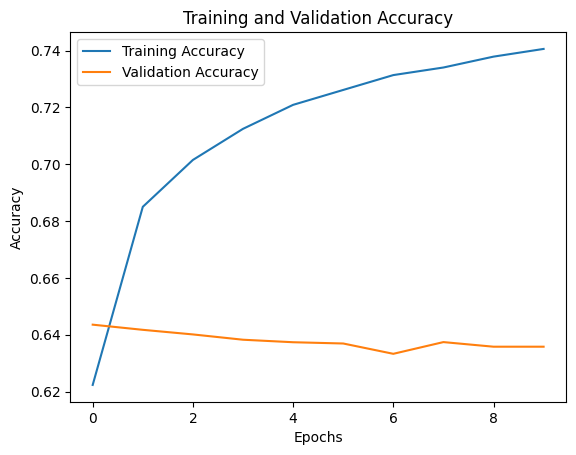

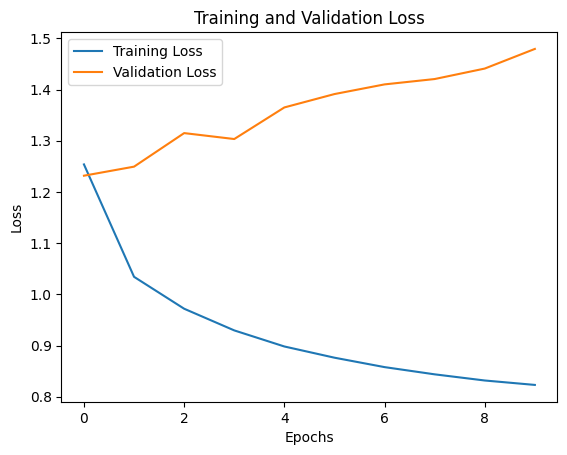

In [ ]:
k.clear_session()
model_1 = Sequential()
model_1.add(Input(shape=(max_len,)))
model_1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

history = model_1.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_1, X_valid_padded, Y_valid_encoded)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 94, 128)             ‚îÇ         268,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,694,619 (822.81 MB)

 Trainable params: 278,419 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 4ms/step - accuracy: 0.5393 - loss: 1.5215 - val_accuracy: 0.6424 - val_loss: 1.2263
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 4ms/step - accuracy: 0.6789 - loss: 1.0523 - val_accuracy: 0.6466 - val_loss: 1.2669
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 4ms/step - accuracy: 0.7026 - loss: 0.9695 - val_accuracy: 0.6496 - val_loss: 1.2965
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 61s 6ms/step - accuracy: 0.7142 - loss: 0.9200 - val_accuracy: 0.6419 - val_loss: 1.3317
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 3ms/step - accuracy: 0.7254 - loss: 0.8779 - val_accuracy: 0.6413 - val_loss: 1.3809
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 4ms/step - accuracy: 0.7330 - loss: 0.8497 - val_accuracy: 

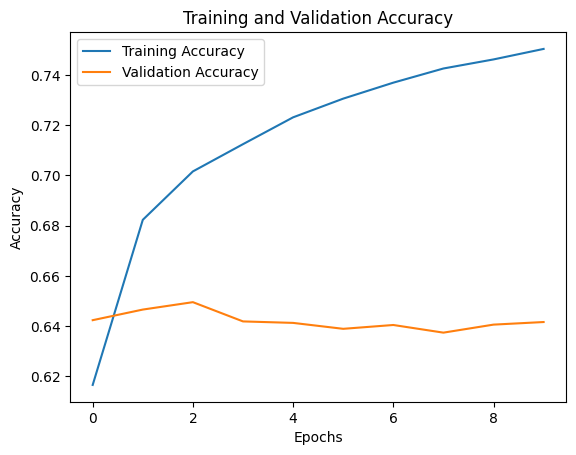

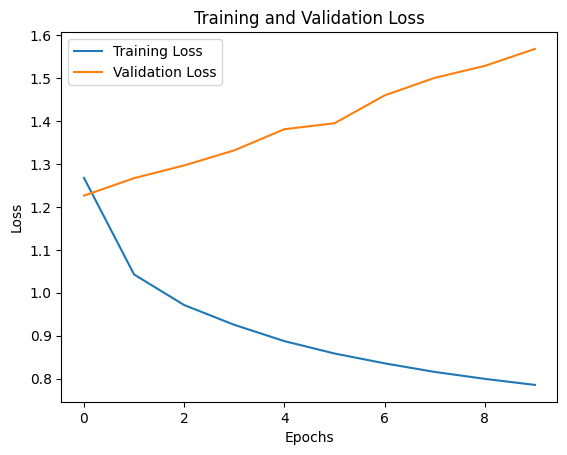

In [ ]:
k.clear_session()
model_2 = Sequential()
model_2.add(Input(shape=(max_len,)))
model_2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_2.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

history = model_2.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_2, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 96, 128)             ‚îÇ         192,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 201,619 (787.57 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 4ms/step - accuracy: 0.5361 - loss: 1.5223 - val_accuracy: 0.6399 - val_loss: 1.2352
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 3ms/step - accuracy: 0.6824 - loss: 1.0414 - val_accuracy: 0.6437 - val_loss: 1.2613
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 3ms/step - accuracy: 0.7080 - loss: 0.9469 - val_accuracy: 0.6442 - val_loss: 1.2862
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 3ms/step - accuracy: 0.7247 - loss: 0.8862 - val_accuracy: 0.6412 - val_loss: 1.3457
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 3ms/step - accuracy: 0.7356 - loss: 0.8460 - val_accuracy: 0.6406 - val_loss: 1.4344
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 3ms/step - accuracy: 0.7443 - loss: 0.8117 - val_accuracy: 

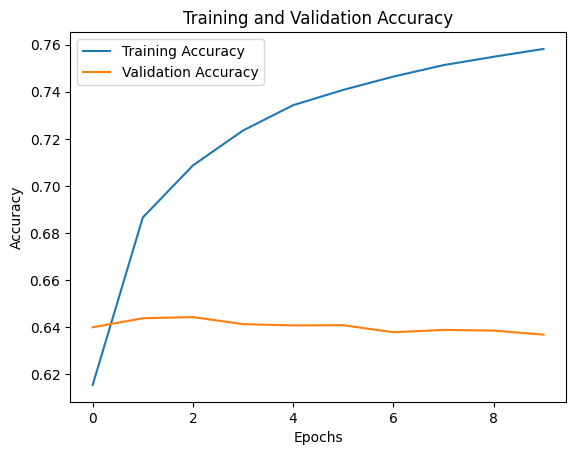

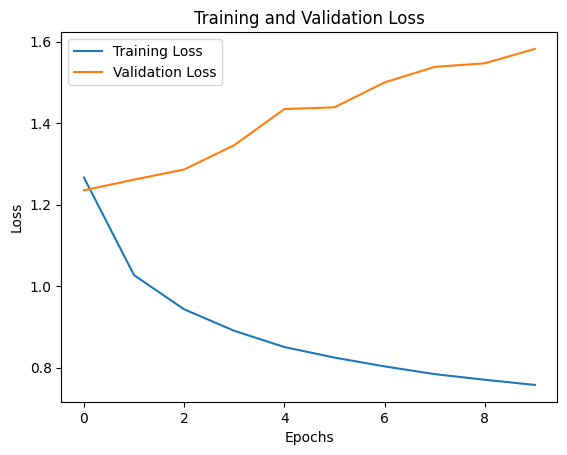

In [ ]:
k.clear_session()
model_3 = Sequential()
model_3.add(Input(shape=(max_len,)))
model_3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

history = model_3.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_3, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 94, 64)              ‚îÇ         134,464 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,556,059 (822.28 MB)

 Trainable params: 139,859 (546.32 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 4ms/step - accuracy: 0.5414 - loss: 1.5220 - val_accuracy: 0.6444 - val_loss: 1.2178
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 3ms/step - accuracy: 0.6754 - loss: 1.0707 - val_accuracy: 0.6440 - val_loss: 1.2490
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 3ms/step - accuracy: 0.6957 - loss: 0.9920 - val_accuracy: 0.6381 - val_loss: 1.2833
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 3ms/step - accuracy: 0.7068 - loss: 0.9489 - val_accuracy: 0.6402 - val_loss: 1.2946
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 3ms/step - accuracy: 0.7142 - loss: 0.9192 - val_accuracy: 0.6396 - val_loss: 1.3324
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 3ms/step - accuracy: 0.7215 - loss: 0.8941 - val_accuracy: 

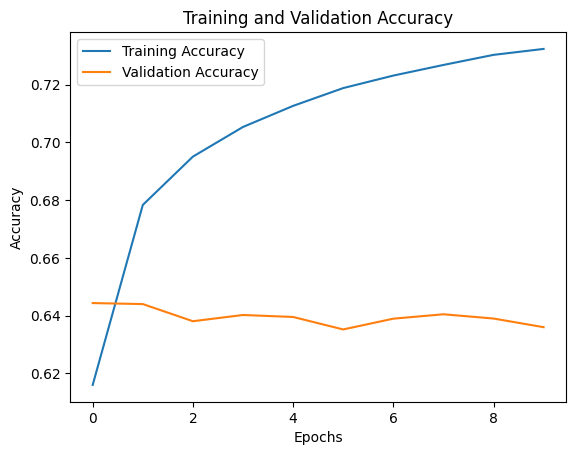

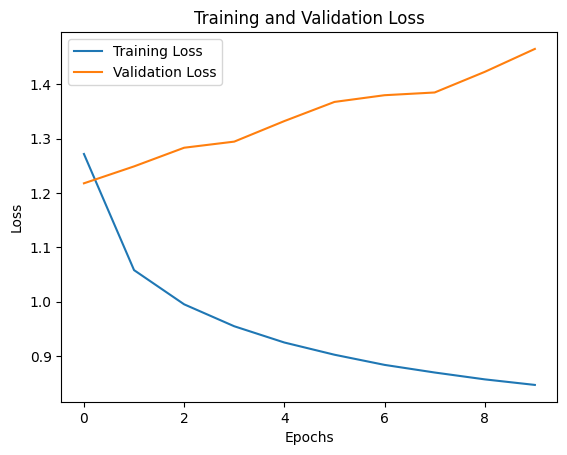

In [ ]:
k.clear_session()
model_4 = Sequential()
model_4.add(Input(shape=(max_len,)))
model_4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_4.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model_4.add(GlobalMaxPooling1D())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

history = model_4.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_4, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ŸÑÿßÿ≠ÿ∏ŸÜÿß Ÿàÿ¨ŸàÿØ overfitting ŸÅŸä ÿ¨ŸÖŸäÿπ ÿßŸÑŸÜŸÖÿßÿ∞ÿ¨ ŸÑÿ∞ÿß ÿßÿÆÿ™ÿ±ŸÜÿß ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ÿ∞Ÿä ÿßŸÑ acc ÿßŸÑÿßÿπŸÑŸâ.

## [5.4]

In [ ]:
k.clear_session()
model_2 = Sequential()
model_2.add(Input(shape=(max_len,)))
model_2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_2.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

history = model_2.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_2, X_test_padded, Y_test_encoded)

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 94, 128)             ‚îÇ         268,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 19)                  ‚îÇ           1,235 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,694,619 (822.81 MB)

 Trainable params: 278,419 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 4ms/step - accuracy: 0.5296 - loss: 1.5518 - val_accuracy: 0.6440 - val_loss: 1.2152
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 4ms/step - accuracy: 0.6761 - loss: 1.0638 - val_accuracy: 0.6472 - val_loss: 1.2400
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 4ms/step - accuracy: 0.6980 - loss: 0.9829 - val_accuracy: 0.6480 - val_loss: 1.2738
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 3ms/step - accuracy: 0.7123 - loss: 0.9285 - val_accuracy: 0.6460 - val_loss: 1.2980
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 4ms/step - accuracy: 0.7241 - loss: 0.8851 - val_accuracy: 0.6431 - val_loss: 1.3708
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 5ms/step - accuracy: 0.7319 - loss: 0.8565 - val_accuracy: 

444/444 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


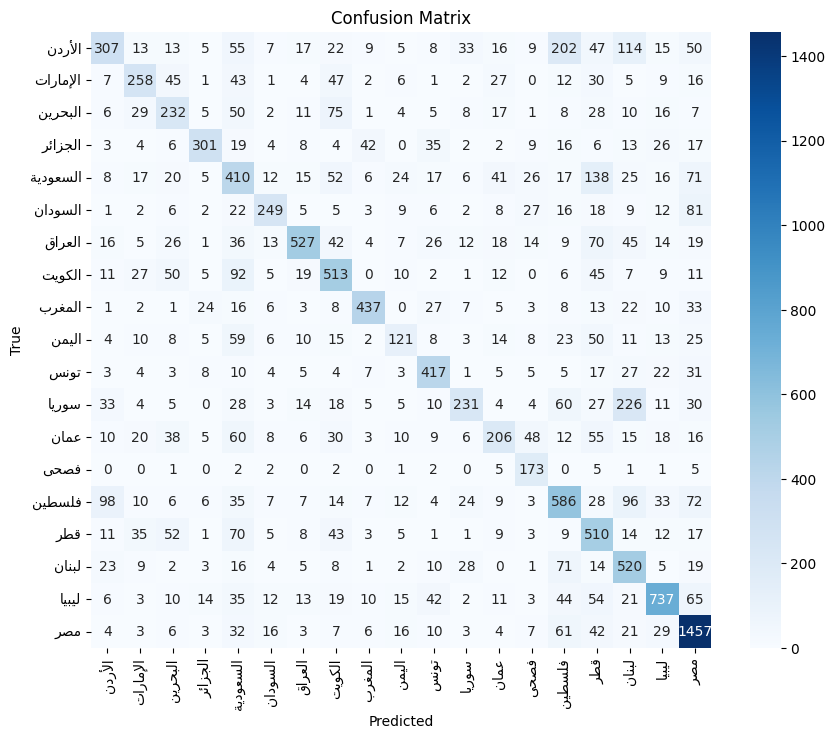

In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = model_2.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

ŸÜŸÑÿßÿ≠ÿ∏ ÿßŸÜ ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ÿ≠ŸÇŸÇ ÿßŸÅÿ∂ŸÑ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ÿπŸÜÿØ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑŸÑÿ¨ÿ© ÿßŸÑŸÖÿµÿ±Ÿäÿ© ÿ®ŸäŸÜŸÖÿß ÿ≥ŸÇŸàŸÖ ÿ®ÿßŸÑÿÆŸÑÿ∑ ÿ®ŸäŸÜ ÿßŸÑŸÑŸáÿ¨ÿ© ÿßŸÑÿ≥Ÿàÿ§ÿ≥ÿ© ŸàÿßŸÑŸÑÿ®ŸÜÿßŸÜŸäÿ©.

## [5.5]

ÿπŸÜÿØ ŸÖŸÇÿßÿ±ŸÜÿ© ŸÜÿ™ÿßÿ¶ÿ¨ ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ™ŸÇÿßÿ±ÿ® ÿ®ŸäŸÜ ÿßŸÑŸÑŸáÿ¨ÿßÿ™ ŸÖÿπ ŸÖÿµŸÅŸàŸÅÿ© ÿßŸÑÿ™ÿπÿ±ÿ∂ Ÿàÿ¨ÿØŸÜÿß ÿßŸÜ ÿßÿ∫ŸÑÿ® ÿßŸÑŸÑŸáÿ¨ÿßÿ™ ÿßŸÑÿ™Ÿä ÿ™ÿ∏Ÿáÿ± ÿ™ŸÇÿßÿ±ÿ® ŸÅŸäŸÖÿß ÿ®ŸäŸÜŸáÿß ŸäŸÖŸäŸÑ ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ŸÑŸÑÿÆŸÑÿ∑ ŸÅŸäŸÖÿß ÿ®ŸäŸÜŸáÿß .

## [5.6]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["City"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["City"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["City"].to_list()


In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

In [ ]:
k.clear_session()
model_22 = Sequential()
model_22.add(Input(shape=(max_len,)))
model_22.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_22.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_22.add(GlobalMaxPooling1D())
model_22.add(Dense(64, activation='relu'))
model_22.add(Dropout(0.5))
model_22.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_22.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_22.summary()

history = model_22.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_22, X_test_padded, Y_test_encoded)

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 94, 128)             ‚îÇ         268,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 27)                  ‚îÇ           1,755 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,695,139 (822.81 MB)

 Trainable params: 278,939 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 4ms/step - accuracy: 0.8785 - loss: 0.4972 - val_accuracy: 0.7245 - val_loss: 0.9858
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 3ms/step - accuracy: 0.9057 - loss: 0.3358 - val_accuracy: 0.7259 - val_loss: 1.0184
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 4ms/step - accuracy: 0.9132 - loss: 0.3010 - val_accuracy: 0.7348 - val_loss: 1.0044
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 4ms/step - accuracy: 0.9159 - loss: 0.2843 - val_accuracy: 0.7386 - val_loss: 1.0739
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 3ms/step - accuracy: 0.9193 - loss: 0.2707 - val_accuracy: 0.7406 - val_loss: 1.0649
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 3ms/step - accuracy: 0.9216 - loss: 0.2603 - val_accuracy: 

444/444 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step


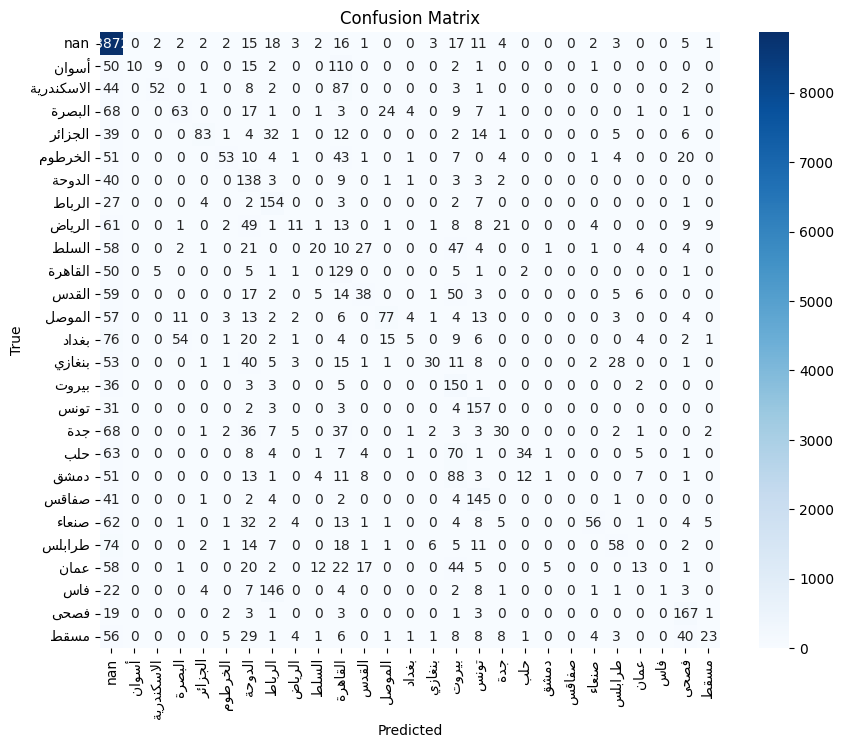

In [ ]:
Y_pred = model_22.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Region"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Region"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Region"].to_list()


In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

In [ ]:
k.clear_session()
model_21 = Sequential()
model_21.add(Input(shape=(max_len,)))
model_21.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_21.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_21.add(GlobalMaxPooling1D())
model_21.add(Dense(64, activation='relu'))
model_21.add(Dropout(0.5))
model_21.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_21.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_21.summary()

history = model_21.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_21, X_test_padded, Y_test_encoded)

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 300)            ‚îÇ     215,416,200 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 94, 128)             ‚îÇ         268,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 64)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 6)                   ‚îÇ             390 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 215,693,774 (822.81 MB)

 Trainable params: 277,574 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 4ms/step - accuracy: 0.8001 - loss: 0.6059 - val_accuracy: 0.8076 - val_loss: 0.5498
Epoch 2/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 4ms/step - accuracy: 0.8602 - loss: 0.4176 - val_accuracy: 0.8095 - val_loss: 0.5488
Epoch 3/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 4ms/step - accuracy: 0.8722 - loss: 0.3774 - val_accuracy: 0.8100 - val_loss: 0.5757
Epoch 4/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 3ms/step - accuracy: 0.8801 - loss: 0.3496 - val_accuracy: 0.8082 - val_loss: 0.5988
Epoch 5/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 3ms/step - accuracy: 0.8859 - loss: 0.3292 - val_accuracy: 0.8068 - val_loss: 0.6197
Epoch 6/10
8370/8370 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 4ms/step - accuracy: 0.8907 - loss: 0.3150 - val_accuracy: 

444/444 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step


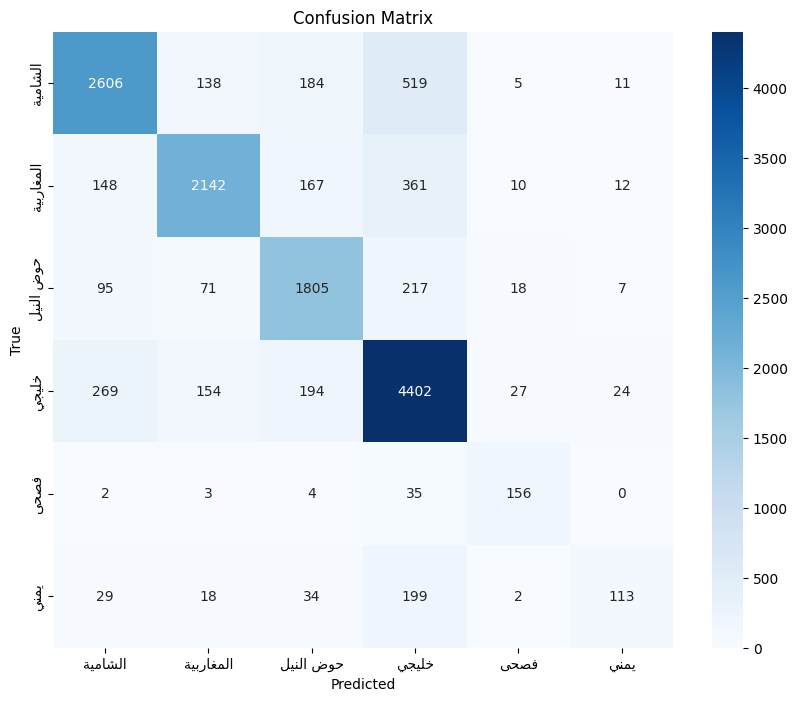

In [ ]:
Y_pred = model_21.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

ŸáŸÜÿß ÿßŸäÿ∂ÿß ŸÑÿßÿ≠ÿ∏ŸÜÿß ÿßŸÜ ÿßŸÑŸáÿ¨ÿßÿ™ ÿßŸÑŸÖÿ™ŸÇÿßÿ±ÿ®ÿ© ÿ≥ŸäŸÇŸàŸÖ ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ÿ®ÿßŸÑÿÆŸÑÿ∑ ÿ®ŸäŸÜŸáÿß ÿ®ŸäŸÜŸÖÿß ÿßŸÑŸÑÿ≠ÿßÿ™ ÿßŸÑÿ™ÿ≥ ÿ™ÿ∏Ÿáÿ± ÿ™ÿ®ÿßÿπÿØ ŸÅÿßÿÆÿ∑ÿßÿ° ÿßŸÑŸÜŸÖŸàÿ≤ÿ¨ ÿ™ŸÉŸàŸÜ ŸÇŸÑŸäŸÑÿß ÿ¨ÿØÿß ÿπŸÜ ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®Ÿáÿß

# ŸÖŸáŸÖÿ© 06 : ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑÿØÿßŸÑŸÑŸä

Semantic representation

## [6.1]

## [6.2]

# Final Results

In [56]:
df = pd.DataFrame(comparison_table)
df

question_step_number                       model_name  \
0                   4.3                    MultinomialNB   
1                   4.4                    MultinomialNB   
2                   4.4                    MultinomialNB   
3                   4.4                    MultinomialNB   
4                   4.4                    MultinomialNB   
5                   4.4                    MultinomialNB   
6                   4.4                    MultinomialNB   
7                   4.4                    MultinomialNB   
8                   4.4                    MultinomialNB   
9                   4.4                    MultinomialNB   
10                  4.4                    MultinomialNB   
11                  4.4                    MultinomialNB   
12                  4.4                    MultinomialNB   
13                  4.5                    MultinomialNB   
14                  4.6                    MultinomialNB   
15                  4.6                    MultinomialNB   
16                  4.6                    MultinomialNB   
17                  4.6                    MultinomialNB   
18                  4.6                    MultinomialNB   
19                  4.6                    MultinomialNB   
20                  4.6                    MultinomialNB   
21                  4.6                    MultinomialNB   
22                  4.6                    MultinomialNB   
23                  4.6                    MultinomialNB   
24                  4.6                    MultinomialNB   
25                  4.6                    MultinomialNB   
26                  4.6                    MultinomialNB   
27                  4.6                    MultinomialNB   
28                5.2.1                              CNN   
29                5.2.2  CNN with Pre-trained Embeddings   
30                5.2.3   CNN with Fine-tuned Embeddings   
31                  5.3   CNN with Fine-tuned Embeddings   
32                  5.3   CNN with Fine-tuned Embeddings   
33                  5.3   CNN with Fine-tuned Embeddings   
34                  5.3   CNN with Fine-tuned Embeddings   

                                  features  \
0                                   TF-IDF   
1                                   TF-IDF   
2                                   TF-IDF   
3                                   TF-IDF   
4                                   TF-IDF   
5                                   TF-IDF   
6                                   TF-IDF   
7                                   TF-IDF   
8                                   TF-IDF   
9                                   TF-IDF   
10                                  TF-IDF   
11                                  TF-IDF   
12                                  TF-IDF   
13                                  TF-IDF   
14                                  TF-IDF   
15                                  TF-IDF   
16                                  TF-IDF   
17                                  TF-IDF   
18                                  TF-IDF   
19                                  TF-IDF   
20                                  TF-IDF   
21                                  TF-IDF   
22                                  TF-IDF   
23                                  TF-IDF   
24                                  TF-IDF   
25                                  TF-IDF   
26                                  TF-IDF   
27                                  TF-IDF   
28                         Word Embeddings   
29  Pre-trained Word Embeddings (word2vec)   
30  Pre-trained Word Embeddings (word2vec)   
31  Pre-trained Word Embeddings (word2vec)   
32  Pre-trained Word Embeddings (word2vec)   
33  Pre-trained Word Embeddings (word2vec)   
34  Pre-trained Word Embeddings (word2vec)   

                                     model_parameters  \
0                                             default   
1                                             default   
2             

In [57]:
df1 = pd.DataFrame(final_table)
df1

question_step_number                      model_name  \
0                  4.6                   MultinomialNB   
1                  5.1                      Sequential   
2                  5.4  CNN with Fine-tuned Embeddings   
3                  5.6  CNN with Fine-tuned Embeddings   
4                  5.6  CNN with Fine-tuned Embeddings   

                                 features  \
0                                  TF-IDF   
1                                  TF-IDF   
2  Pre-trained Word Embeddings (word2vec)   
3  Pre-trained Word Embeddings (word2vec)   
4  Pre-trained Word Embeddings (word2vec)   

                                    model_parameters  \
0                       alpha=0.5,max_features=50000   
1  128,64 units,Dropout 0.5, Adam optimizer,max_f...   
2  Embedding dim: 300, 128 filters, kernel size: ...   
3  Embedding dim: 300, 128 filters, kernel size: ...   
4  Embedding dim: 300, 128 filters, kernel size: ...   

                          preprocessing_methods  accuracy  balance_accuracy  \
0                 remove_link,remove_diacritics  0.593964          0.566590   
1                 remove_link,remove_diacritics  0.671528          0.595162   
2  Tokenization, Padding, Preprocessing methods  0.577674          0.561907   
3  Tokenization, Padding, Preprocessing methods  0.735139          0.324180   
4  Tokenization, Padding, Preprocessing methods  0.791482          0.709451   

    f_score  
0  0.583690  
1  0.664880  
2  0.573618  
3  0.691373  
4  0.787914

In [59]:
df1.to_csv("[ÿ•ŸÜÿ¨Ÿä ÿ∫ÿ®Ÿäÿ≥-ÿØÿßŸÜÿß ŸÉŸÑÿ¥].csv", index=False)